# [Instacart](https://www.instacart.com/store) Grocery Basket Data Analysis: Data Analysis and Visualizations

## Table of Contents

### 1. [Import libraries](#Import_libraries)

### 2. [Import data](#Import_data)

### 3. [Data analysis and visualization](#Data_analysis)

- [Orders](#orders)
 - [Order distribution across days of week and hours of day](#distribution)
 - [Order distribution by user loyalty status](#loyalty)
 - [Order distribution and spending range across region](#region)

- [Products](#products)
 - [Expenditure by hour of day](#expenditure)
 - [Price range grouping and analysis](#price_range)
 - [Product popularity](#popularity)
 - [Department popularity](#dept_popularity)

- [Customers](#customers)
 - [Age and family situation](#age_family)
 - [Age and spending power](#age_income)
 - [Return frequency](#return)
 - [Excluding low-activity customers](#low_activity_customers)
 - [Customer segmentation and profiling](#profiling)
 - [Analyzing customer profiles](#profile_analysis)
 - [Further analysis of each profile](#further_analysis)
    - [Big family](#big)
    - [One-person household](#one)
    - [Family](#family)
    - [Single parent](#single)
 - [Analyzing customer behavior](#behavior_analysis)
   - [Analysis of usage frequency and expenditure](#usage_expenditure)
   - [Customer behavior by Regions](#regional_behavior)
   - [Department popularity across profiles](#prod_popularity)
   - [Average regional expenditure across profiles](#reg_expenditure)

<a id='Import_libraries'></a>
# 1. Import libraries

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize']=14,7

<a id='Import_data'></a>
# 2. Import data

In [2]:
# Create a string of the path for the main project folder

path = r'C:\Users\Ryan\Documents\07-17-2023 Instacart Basket Analysis'

In [3]:
# Import the “customers.csv” data set using the os library

df_custs = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col=False)

In [4]:
# Import the “departments_wrangled.pkl” data set using the os library

df_depts = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.pkl'))

In [5]:
# Import the “orders_products_all.pkl” data set using the os library

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

<a id='Data_analysis'></a>
# 3. Data analysis and visualization

The marketing and sales team want answers to the following questions:
- Questions based on orders:
 - What are the busiest days of the week and hours of the day (i.e., the days and times with the most orders)?
 - Are there differences in ordering habits based on a customer's loyalty status?
 - Are there differences in ordering habits based on a customer's region?
- Questions based on products:
 - Is there a difference in expenditure depending on the hour of the day?
 - Are there differences in ordering habits based on a customer's region?
 - Are there certain types of products that are more popular than others?
 - Which departments have the highest frequency of product orders?
- Questions based on customer:
 - Is  there a connection between age and the number of dependants in terms of ordering habits?
 - Is there a connection between age and spending power (income)?
 - How often do customers return to Instacart?
 - What differences can you find in ordering habits of different customer profiles?
 - What is the distribution of orders by customer profile across regions?
 - What departments are most popular for different profiles?
 - What is the average price of products ordered by people with different family status in different regions?

<a id='orders'></a>
## Orders

<a id='distribution'></a>
### Order distribution across days of week and hours of day

#### What are the busiest days of the week and hours of the day (i.e., the days and times with the most orders)?

Text(0.4, 6000000, 'Saturday is the busiest day of the week')

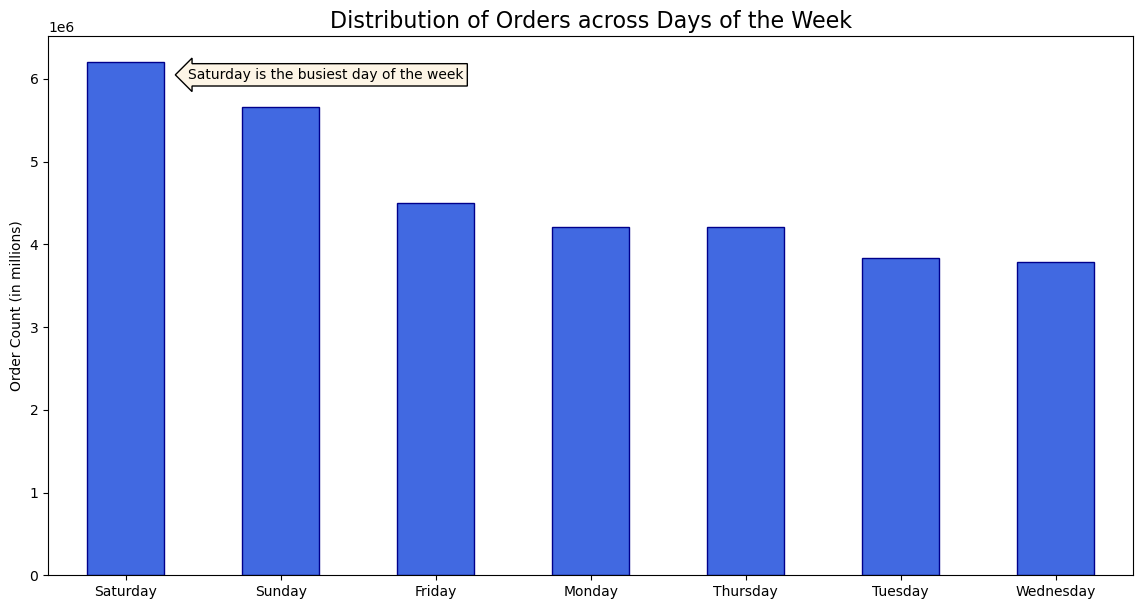

In [6]:
# Visualizing distribution of orders across all days of the week

bar_week=ords_prods_all['orders_day_of_week'].value_counts().sort_values(ascending=False).plot.bar(facecolor='royalblue', edgecolor='darkblue')
plt.xticks(rotation=0)
plt.title('Distribution of Orders across Days of the Week', fontsize=16)
bar_week.set_xticklabels(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'])
plt.ylabel('Order Count (in millions)', fontsize=10)
plt.annotate('Saturday is the busiest day of the week', xy=(0,630000), xytext=(0.4,6000000), bbox={'fc':'oldlace', 'ec':'k','boxstyle': 'larrow,pad=0.3'})

Text(5.4, 2700000, '10 AM is the busiest hour')

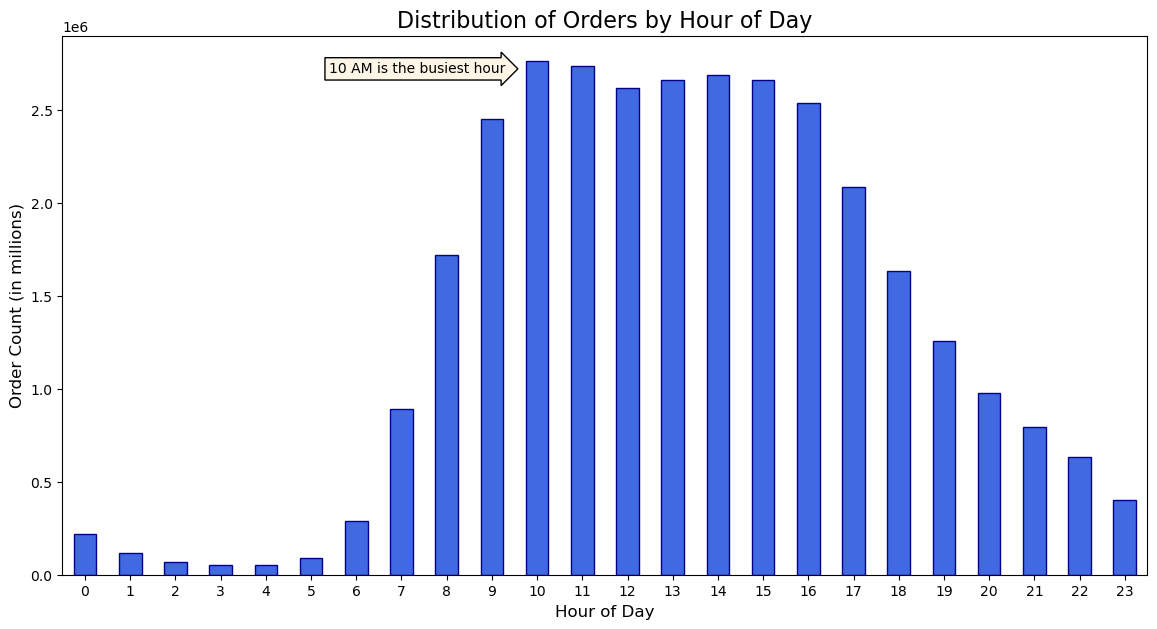

In [7]:
# Visualizing distribution of orders across all hours of the day

bar_hour=ords_prods_all['order_hour_of_day'].value_counts().sort_index().plot.bar(facecolor='royalblue', edgecolor='darkblue')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Order Count (in millions)', fontsize=12)
plt.title('Distribution of Orders by Hour of Day', fontsize=16)
plt.annotate('10 AM is the busiest hour', xy=(10,2761760), xytext=(5.4, 2700000), bbox={'fc':'oldlace', 'ec':'k','boxstyle': "rarrow,pad=0.3"})

To see if the daily order distribution is different on weekends and weekdays, a new variable 'week' is derived from the orders_day_of_the_week column with the following labels:
- Weekend (days 0 and 1)
- Weekday (days 2,3,4,5 and 6)

In [8]:
# Create 'week' column

ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([0,1]), 'week'] = 'Weekend'
ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([2,3,4,5,6]), 'week'] = 'Weekday'

In [9]:
# Check frequencies of 'week' column

ords_prods_all['week'].value_counts(dropna = False)

Weekday    20540447
Weekend    11864412
Name: week, dtype: int64

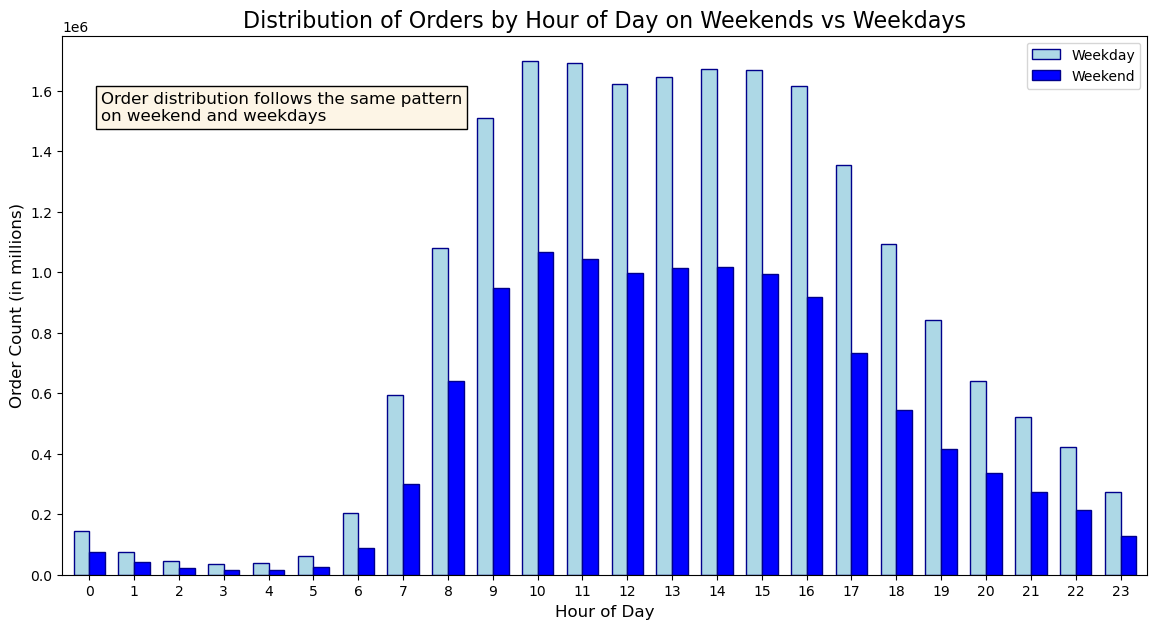

In [10]:
# Visualizing distribution of orders on weekends vs weekdays by hour of the day

bar_hour_week=ords_prods_all.pivot_table(values='orders_day_of_week', index='order_hour_of_day', columns='week', aggfunc='count'
                                        ).plot.bar(width=0.7, stacked=False, color=['lightblue', 'blue'], edgecolor='darkblue')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Order Count (in millions)', fontsize=12)
plt.title('Distribution of Orders by Hour of Day on Weekends vs Weekdays', fontsize=16)
plt.annotate('Order distribution follows the same pattern\non weekend and weekdays', xy=(0.5,1500000),
             xytext=(0.25,1500000), fontsize=12, bbox={'fc':'oldlace', 'ec':'k','boxstyle': 'square,pad=0.3'})
plt.legend(title='')

In [11]:
# Export the visualizations

bar_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order distribution by day of week'), bbox_inches='tight')
bar_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order distribution by hour of day'), bbox_inches='tight')
bar_hour_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order distribution by weekend vs weekday'), bbox_inches='tight')

**Conclusion**

- Weekends are the busiest days of the week, with Saturday being the busiest.
- The busiest hours of the day occur from 10am to 3pm, with 10am being the busiest.

<a id='loyalty'></a>
### Order distribution by user loyalty status

#### Are there differences in ordering habits based on a customer's loyalty status?

**Create loyalty status column**

We will create a 'loyalty_status' column using the following criteria:
- New customer: at most 10 orders
- Regular customer: 11 to 40 orders
- Loyal customer: more than 40 orders

In [12]:
# Create 'max_order' column in ords_prods_all to determine the max number of orders each customer makes

ords_prods_all['max_order'] = ords_prods_all.groupby(['user_id'])['order_number'].transform(np.max)

In [13]:
# Create loyalty_status column in ords_prods_all

ords_prods_all.loc[ords_prods_all['max_order'] <= 10, 'loyalty_status'] = 'New customer'
ords_prods_all.loc[(ords_prods_all['max_order'] > 10) & (ords_prods_all['max_order'] <= 40), 'loyalty_status'] = 'Regular customer'
ords_prods_all.loc[ords_prods_all['max_order'] > 40, 'loyalty_status'] = 'Loyal customer'

In [14]:
# Check frequencies of 'loyalty_status' column

ords_prods_all['loyalty_status'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_status, dtype: int64

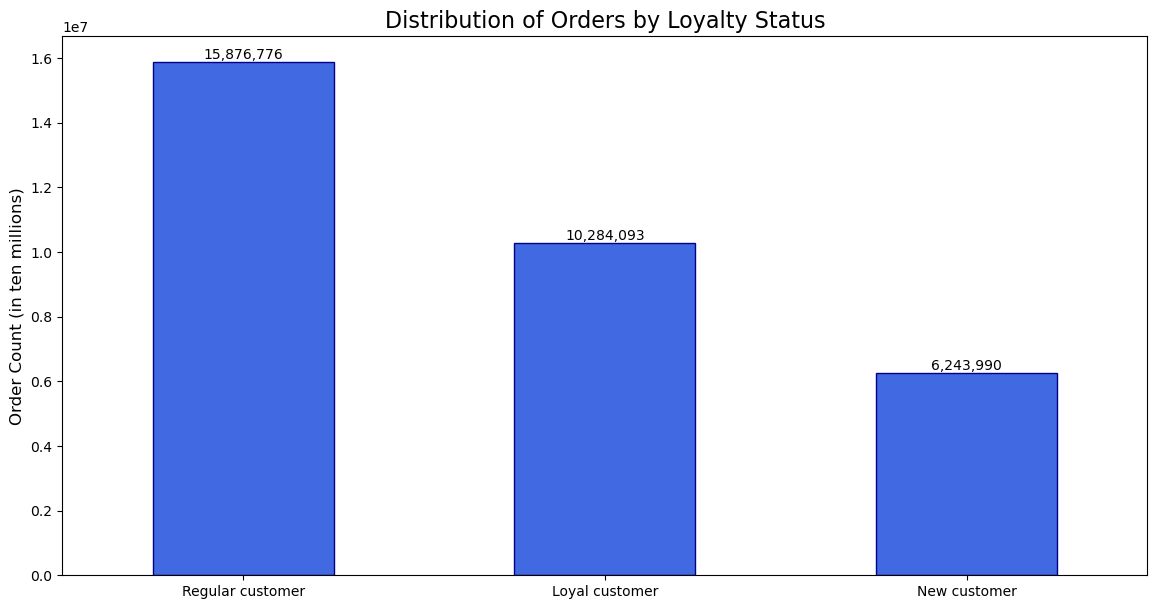

In [15]:
# Visualizing the distribution of orders by loyalty status

bar_loyal=ords_prods_all['loyalty_status'].value_counts().sort_values(ascending=False).plot.bar(color='royalblue', edgecolor='darkblue')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Order Count (in ten millions)', fontsize=12)
plt.title('Distribution of Orders by Loyalty Status', fontsize=16)



# Display the counts above the bars

for i in bar_loyal.containers:
    bar_loyal.bar_label(i,fmt='{:,.0f}')

In [16]:
# Export the visualization

bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order distribution by loyalty status'), bbox_inches='tight')

<a id='region'></a>
### Order distribution and spending range across region

#### Are there differences in ordering habits based on a customer's region?

**Create spender status column**

We will create a 'spender status' column using the following criteria:
- Low spender: mean price spent by customer is below 10
- High spender: mean price spent by customer is 10 or more

In [17]:
# Create 'mean_spent' column for each user id in ords_prods_merge

ords_prods_all['mean_spent'] = ords_prods_all.groupby(['user_id'])['prices'].transform(np.mean)

In [18]:
# Create 'spender status' column

ords_prods_all.loc[ords_prods_all['mean_spent'] < 10, 'spender_status'] = 'Low spender'
ords_prods_all.loc[ords_prods_all['mean_spent'] >= 10, 'spender_status'] = 'High spender'

In [19]:
# Check frequencies of 'spender status' column

ords_prods_all['spender_status'].value_counts(dropna = False)

Low spender     32285424
High spender      119435
Name: spender_status, dtype: int64

**Create region column**

The 50 states in the United States will be divided into four regions as follows:
- **South:**  Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
- **West:**  Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii
- **Midwest:**  Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
- **Northeast:**  Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey

In [20]:
# Create region column in ords_prods_all

ords_prods_all.loc[ords_prods_all['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
ords_prods_all.loc[ords_prods_all['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'
ords_prods_all.loc[ords_prods_all['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [21]:
# Check frequencies of 'region' column

ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

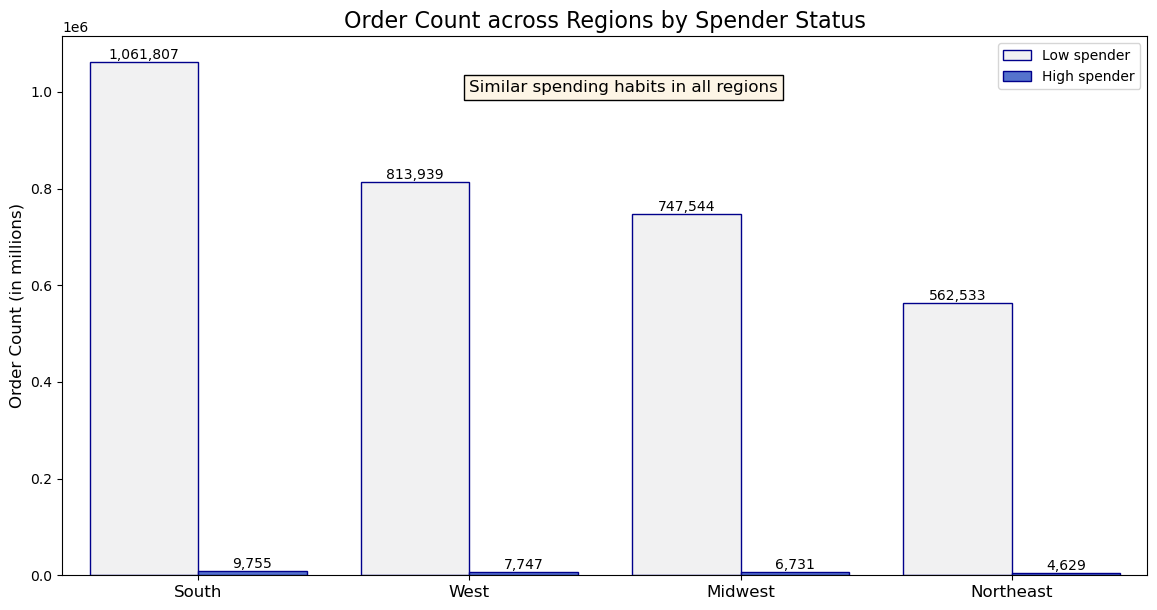

In [22]:
# Group the data by region and spending range

df=ords_prods_all.groupby(['region','spender_status'])['order_id'].agg('nunique').sort_values(ascending=False).rename_axis(['region','spender_status']).reset_index(name='order_count')



# Visualizing order count across regions by spender status

bar_region_spender=sns.barplot(x='region', y='order_count', data=df, color='royalblue', edgecolor='darkblue', hue='spender_status')
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Order Count (in millions)', fontsize=12)
plt.title('Order Count across Regions by Spender Status', fontsize=16)
plt.annotate('Similar spending habits in all regions', xy=(1,1000000), xytext=(1,1000000), fontsize=12, bbox={'fc':'oldlace', 'ec':'k','boxstyle': "square,pad=0.3"})
plt.legend(title='')



# Display the counts above the bars

for i in bar_region_spender.containers:
    bar_region_spender.bar_label(i,fmt='{:,.0f}')

In [23]:
# Export the visualization

bar_region_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders by region and spender'), bbox_inches='tight')

<a id='products'></a>
## Products

<a id='expenditure'></a>
### Expenditure by hour of day

#### Is there a difference in expenditure depending on the hour of the day?

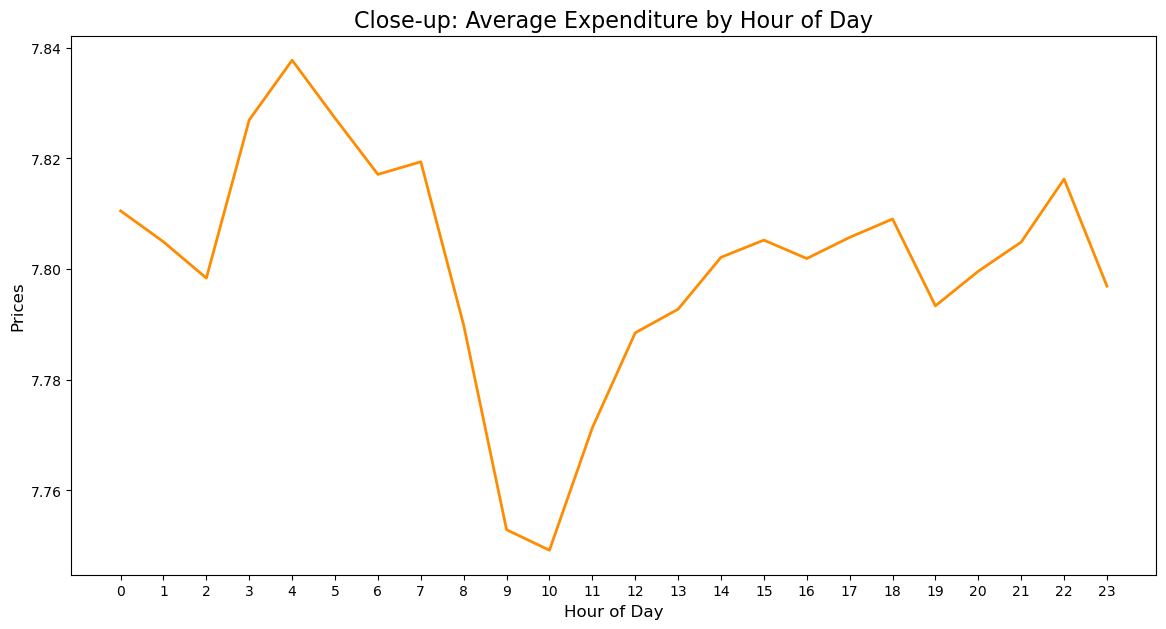

In [24]:
# Visualizing expenditure by hour of day

line_price_close=ords_prods_all.pivot_table(values='prices', index='order_hour_of_day', aggfunc='mean').plot(linewidth=2, color='darkorange')
plt.title('Close-up: Average Expenditure by Hour of Day', fontsize=16)
plt.xticks(np.arange(24), fontsize=10)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Prices', fontsize=12)
line_price_close.get_legend().remove()

The lineplot shows a very close view of expenditure per hour; the difference between the lowest and highest value is approximately 10 cents. This would imply expenditure stays roughly the same throughout the day.

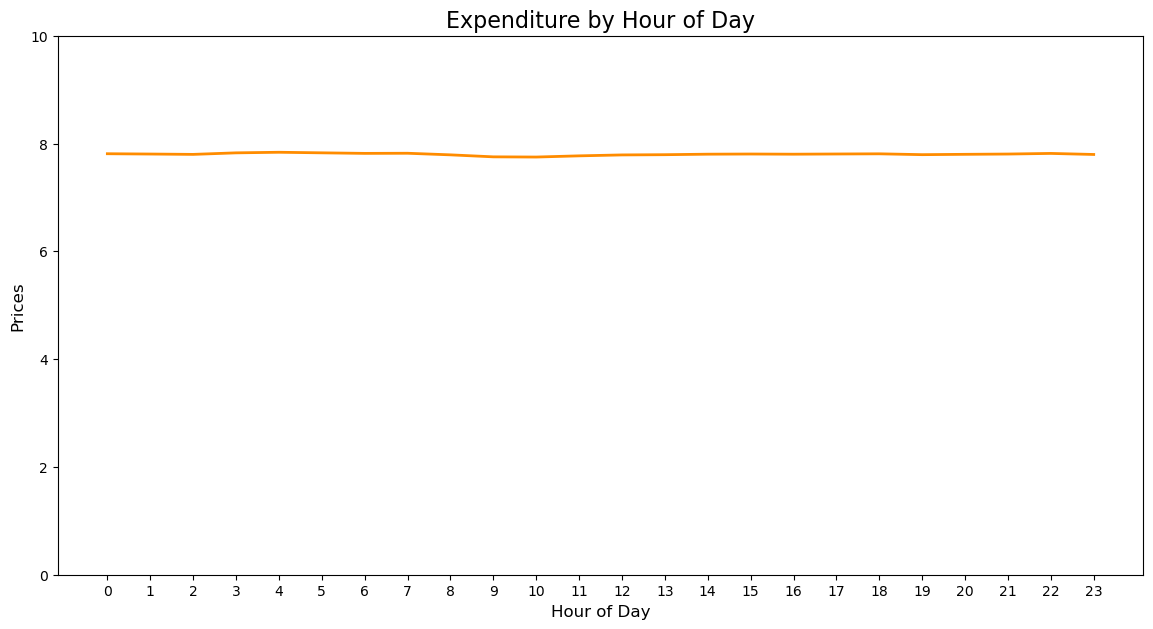

In [25]:
# Visualizing expenditure by hour of day

line_price=ords_prods_all.pivot_table(values='prices', index='order_hour_of_day', aggfunc='mean').plot(linewidth=2, color='darkorange')
plt.title('Expenditure by Hour of Day', fontsize=16)
plt.xticks(np.arange(24), fontsize=10)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.ylim(0,10)
line_price.get_legend().remove()

When the y-axis is fixed, the line chart confirms that the expenditure stays roughly the same throughout the day.

In [26]:
# Export the visualizations

line_price_close.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Close-up expenditure by hour'), bbox_inches='tight')
line_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Expenditure by hour'), bbox_inches='tight')

<a id='price_range'></a>
### Price range grouping and analysis

#### Since Instacart has a lot of products with different price tags, marketing and sales want to use simpler price range groupings to help direct their efforts.

**Create price range column**

We will create a 'price_range' column using the following criteria:
- Low-range product: price is at most 5
- Mid-range product: price is higher than 5 but at most 15
- High-range product: price is higher than 15

In [27]:
# Create price_range column in ords_prods_all

ords_prods_all.loc[ords_prods_all['prices'] <= 5, 'price_range'] = 'Low-range product'
ords_prods_all.loc[(ords_prods_all['prices'] <= 15) & (ords_prods_all['prices'] > 5), 'price_range'] = 'Mid-range product'
ords_prods_all.loc[ords_prods_all['prices'] > 15, 'price_range'] = 'High-range product'

In [28]:
# Check 'price_range' frequencies

ords_prods_all['price_range'].value_counts(dropna = False)

Mid-range product     21861558
Low-range product     10130750
High-range product      412551
Name: price_range, dtype: int64

#### Are there differences in ordering habits based on a customer's region?

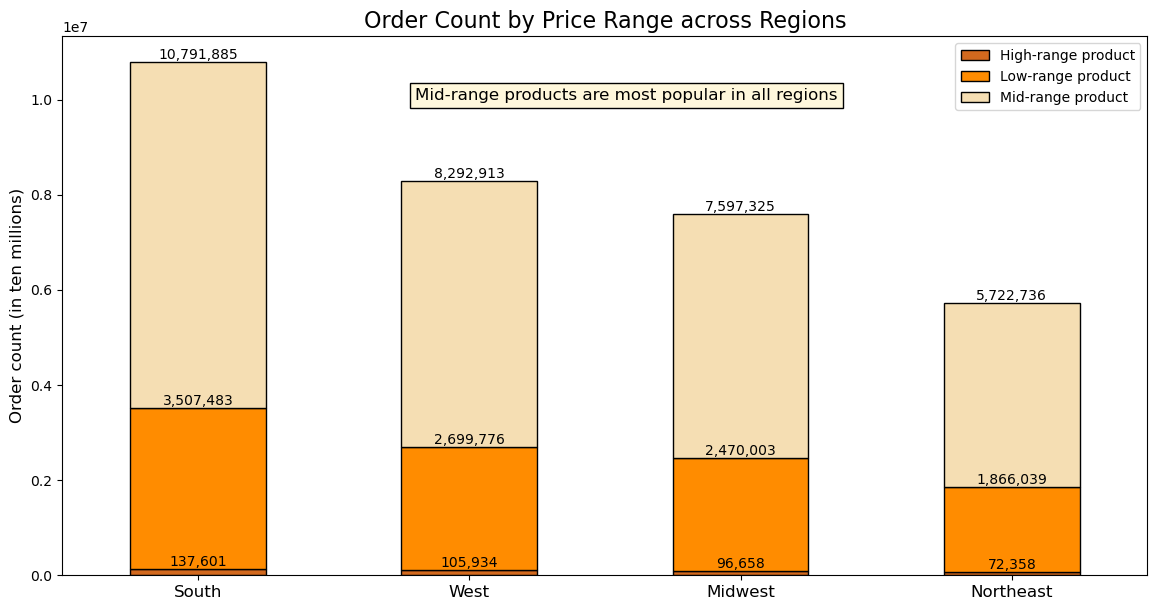

In [29]:
# Create a crosstab of region and price_range

df=pd.crosstab(ords_prods_all['region'],ords_prods_all['price_range']).sort_values('Mid-range product', ascending=False)



# Visualizing order count across different price ranges by region

bar_region_price=df.plot(kind='bar', stacked=True, color=['chocolate','darkorange','wheat'], edgecolor='black')
plt.title('Order Count by Price Range across Regions', fontsize=16)
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('')
plt.ylabel('Order count (in ten millions)', fontsize=12)
plt.annotate('Mid-range products are most popular in all regions', xy=(0.8,10000000), xytext=(0.8,10000000),
             fontsize=12, bbox={'fc':'cornsilk', 'ec':'k','boxstyle': "square,pad=0.3"})
plt.legend(title='')



# Display the counts above the bars

for i in bar_region_price.containers:
    bar_region_price.bar_label(i,fmt='{:,.0f}')

In [30]:
# Export the visualization

bar_region_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order count by price range across regions'), bbox_inches='tight')

<a id='popularity'></a>
### Product popularity

#### Are there certain types of products that are more popular than others?

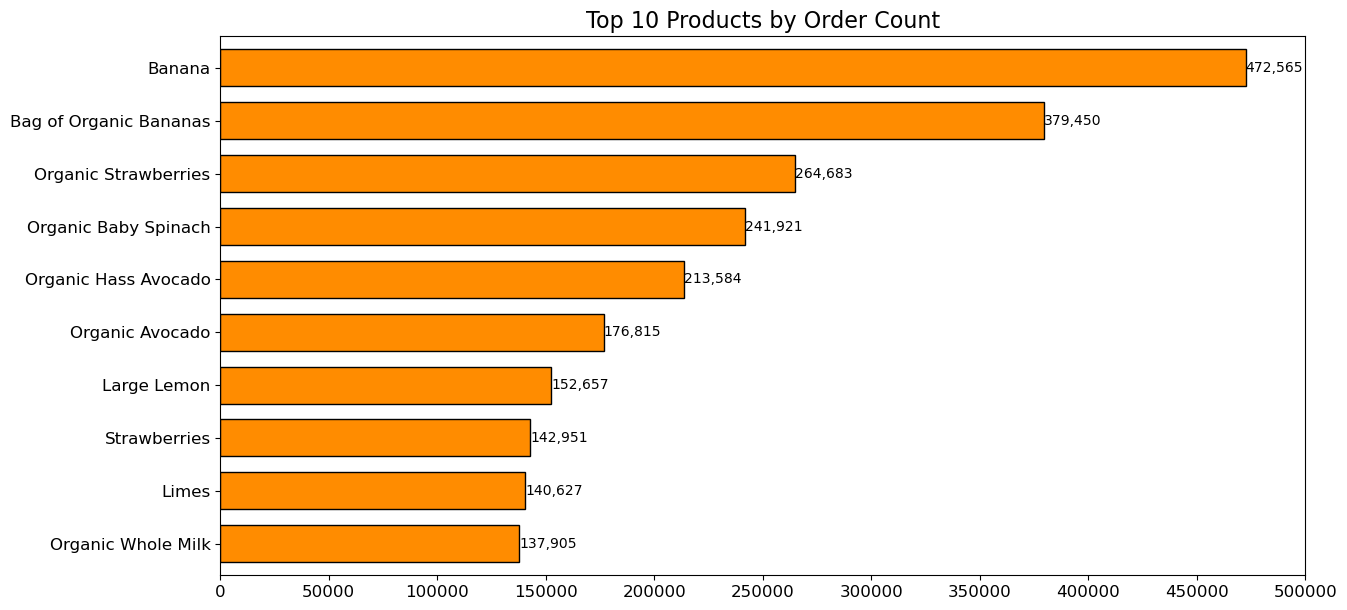

In [31]:
# Visualizing the top 10 products by order count

bar_top_ten=ords_prods_all['product_name'].value_counts().sort_values(ascending=True).tail(10).plot.barh(width=0.7, color='darkorange', edgecolor='black')
plt.xticks(range(0,500001,50000), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Products by Order Count', fontsize=16)



# Display the counts to the right of the bars

for i in bar_top_ten.containers:
    bar_top_ten.bar_label(i,fmt='{:,.0f}')

In [32]:
# Export the visualization

bar_top_ten.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Top ten products'), bbox_inches='tight')

<a id='dept_popularity'></a>
### Department popularity

#### Which departments have the highest frequency of product orders?

In [33]:
# Check df_depts output

df_depts

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [34]:
# Create a dictionary for department_id

dept_dict = {1: 'frozen',
             2: 'other',
             3: 'bakery',
             4: 'produce',
             5: 'alcochol',
             6: 'international',
             7: 'beverages',
             8: 'pets',
             9: 'dry goods pasta',
            10: 'bulk',
            11: 'personal care',
            12: 'meat seafood',
            13: 'pantry',
            14: 'breakfast',
            15: 'canned goods',
            16: 'dairy eggs',
            17: 'household',
            18: 'babies',
            19: 'snacks',
            20: 'deli',
            21: 'missing'}

In [35]:
# Create department column using .map function and a dictionary

ords_prods_all['department']=ords_prods_all['department_id'].map(dept_dict)

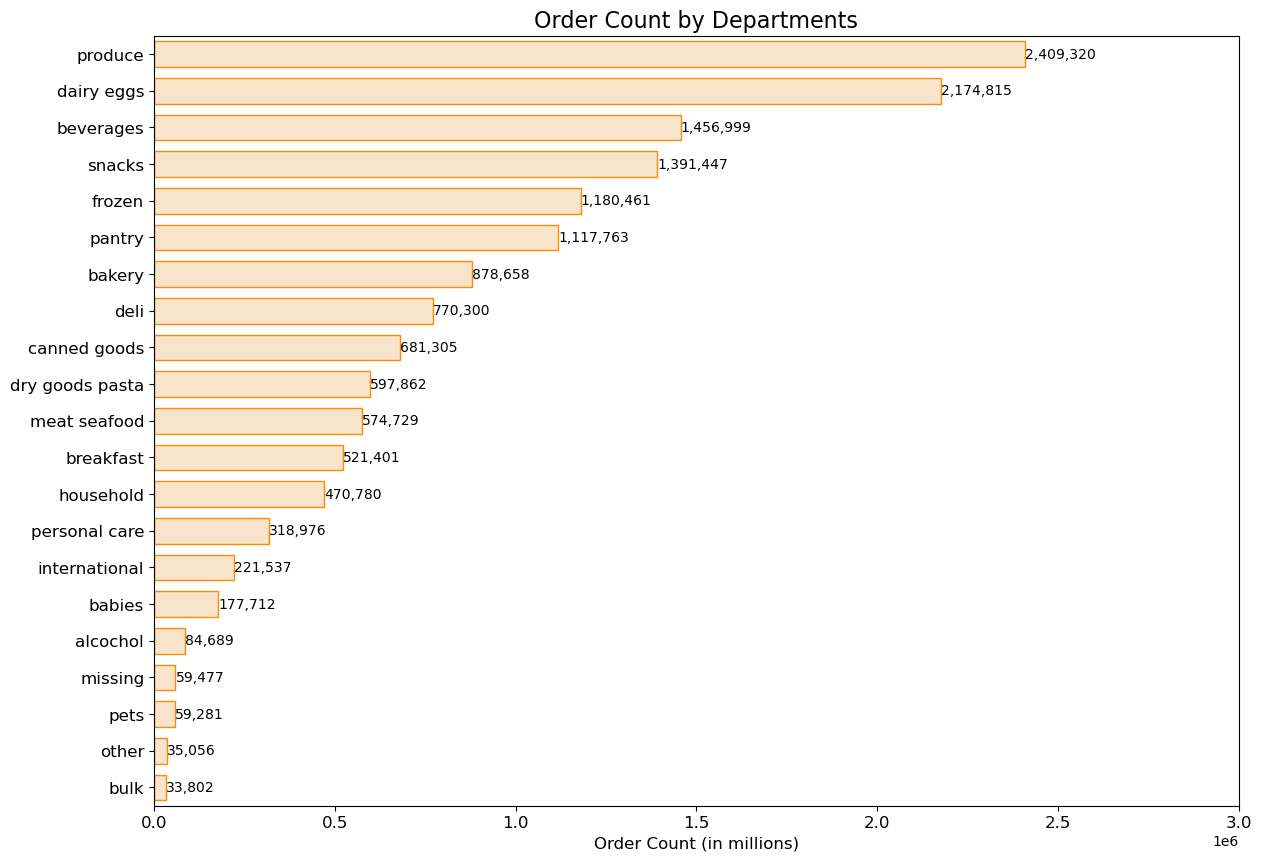

In [36]:
# Group the records by department name to see the order count for each group

df=ords_prods_all.groupby(['department'])['order_id'].agg('nunique').sort_values(ascending=False).reset_index(name='order_count')



# Visualizing order count by department

plt.figure(figsize=(14,10))
bar_dept=sns.barplot(data=df, x='order_count', y='department', color='bisque', edgecolor='darkorange', width=0.7)
plt.title('Order Count by Departments', fontsize=16)
plt.xticks(range(0,3000001,500000), fontsize=12)
plt.xlabel('Order Count (in millions)', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')



# Display the counts to the right of the bars

for i in bar_dept.containers:
    bar_dept.bar_label(i,fmt='{:,.0f}')

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


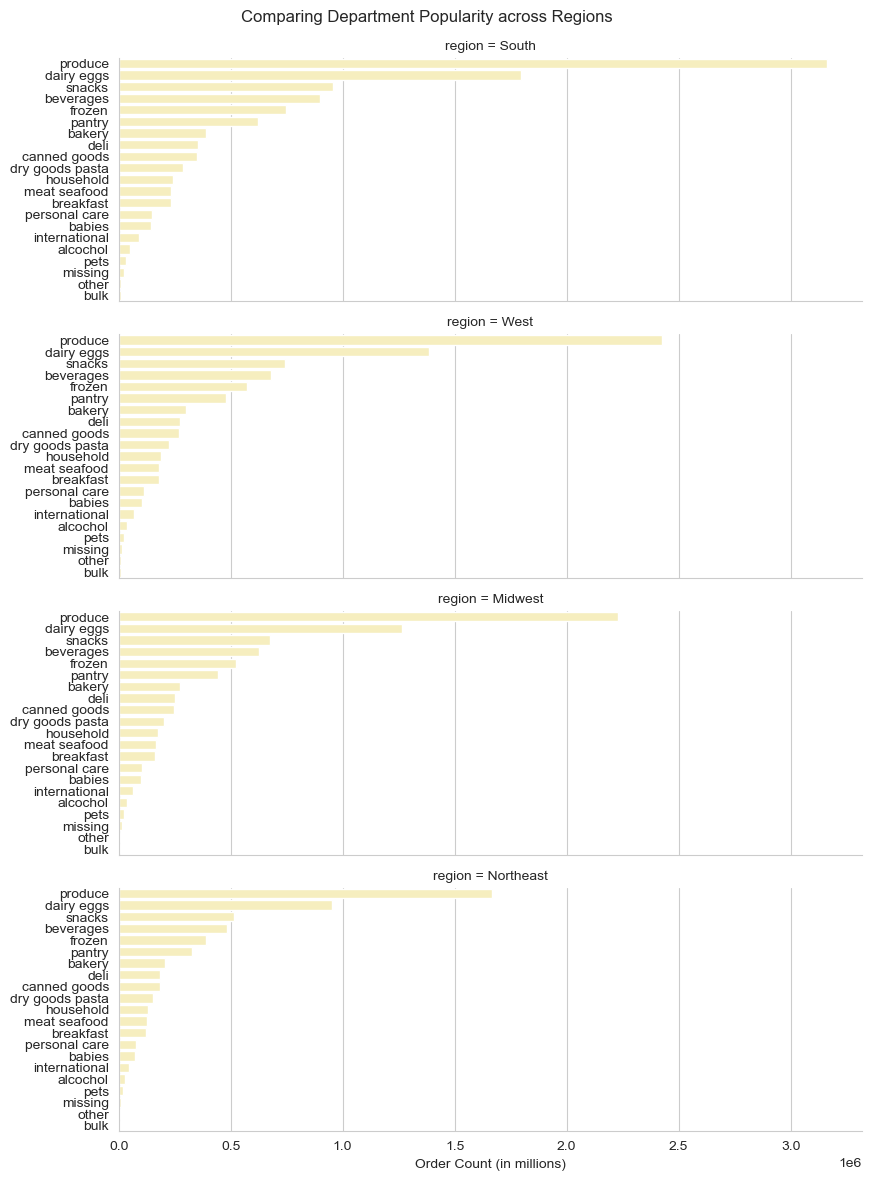

In [37]:
# Visualizing department popularity across regions

df=ords_prods_all.groupby('region')['department'].value_counts().sort_values(ascending=False).reset_index(name='count')
sns.set_style('whitegrid')
sns.set_palette('YlOrBr')
grid_region=sns.FacetGrid(df, row='region', height=3, aspect=3)
grid_region.map(sns.barplot, 'count', 'department')
grid_region.fig.subplots_adjust(top=0.94)
grid_region.fig.suptitle('Comparing Department Popularity across Regions')
grid_region.set_axis_labels('Order Count (in millions)', '')

In [38]:
# Export the visualizations

bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department popularity'), bbox_inches='tight')
grid_region.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department popularity by region'), bbox_inches='tight')

<a id='customers'></a>
## Customers

<a id=age_family></a>
### Age and family situation

#### Is  there a connection between age and the number of dependants in terms of ordering habits?

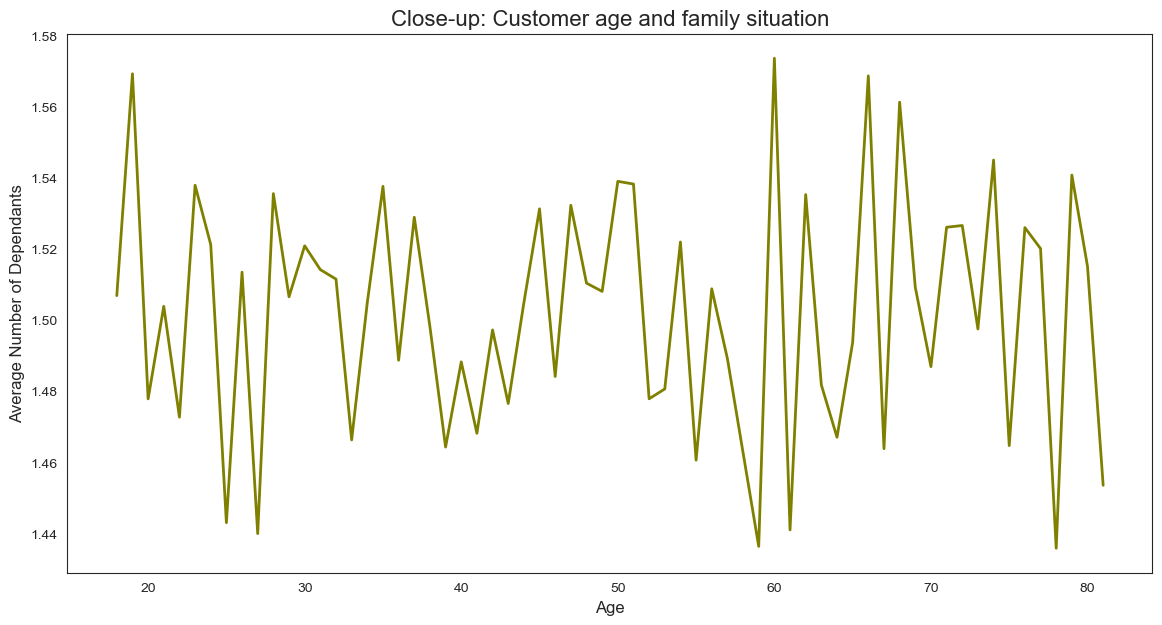

In [39]:
# Visualizing age and number of dependants

sns.set_palette('tab10')
sns.set_style('white')
line_age_dep_close=ords_prods_all.pivot_table(values='n_dependants', index='age', aggfunc='mean').plot(linewidth=2, color='olive')
plt.title('Close-up: Customer age and family situation', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Number of Dependants', fontsize=12)
line_age_dep_close.get_legend().remove()

The lineplot shows a very close view of the average number of dependants per age; the difference between the lowest and highest value is approximately 0.15. This would imply the average number of children is about the same for all ages.

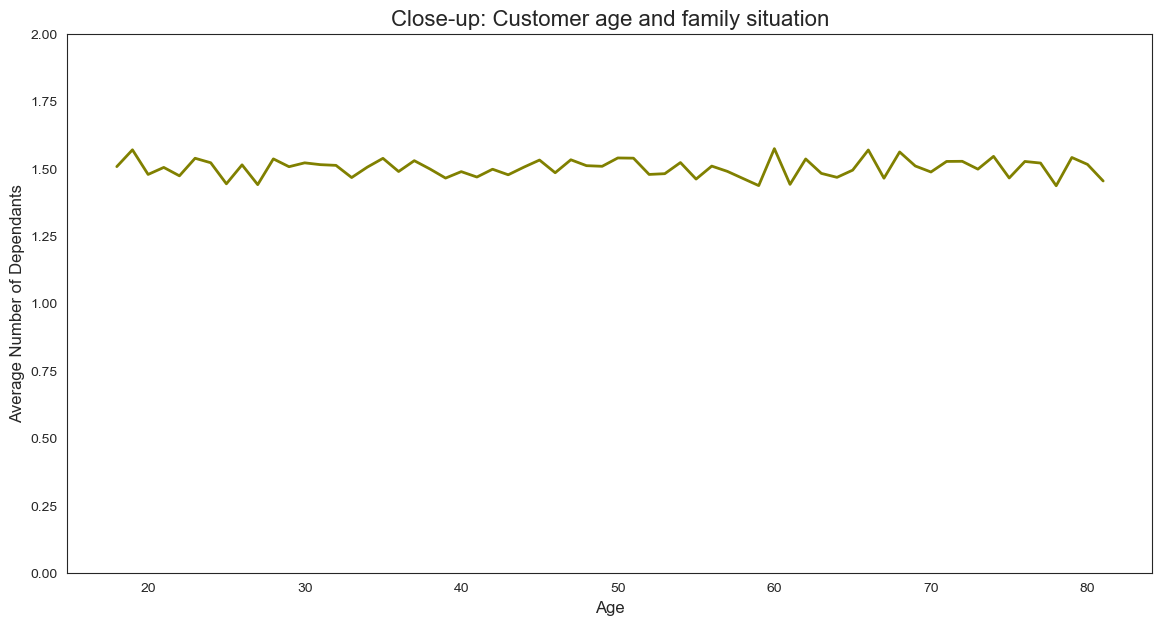

In [40]:
# Visualizing age and number of dependants

line_age_dep=ords_prods_all.pivot_table(values='n_dependants', index='age', aggfunc='mean').plot(linewidth=2, color='olive')
plt.title('Close-up: Customer age and family situation', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Number of Dependants', fontsize=12)
plt.ylim(0,2)
line_age_dep.get_legend().remove()

When the y-axis is fixed, the line chart confirms that the average number of children is about the same for all ages.

**Note:** It's important to recall that the customer data set was fabricated by CareerFoundry in service of learning. This sort of relationship between age and average number of dependants is inaccurate. In a normal setting, we would not see both young and senior customers having the same number of dependents, on average.

In [41]:
# Export the visualizations

line_age_dep_close.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer age and fam situation close-up'), bbox_inches='tight')
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer age and family situation'), bbox_inches='tight')

<a id=age_income></a>
### Age and spending power

#### Is there a connection between age and spending power (income)?

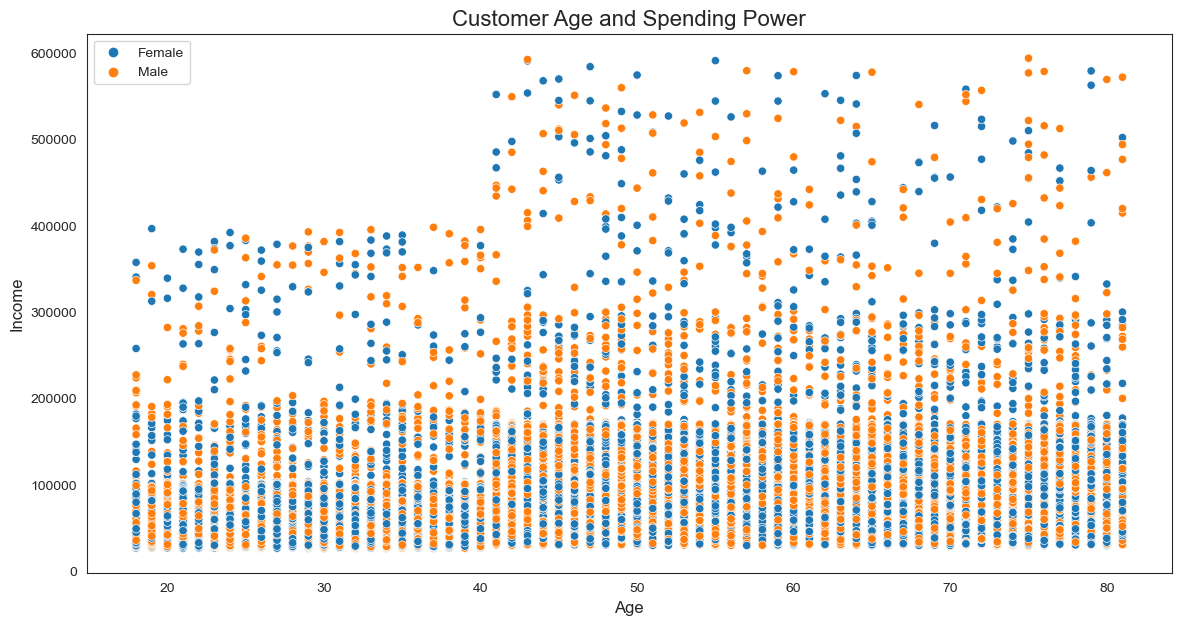

In [42]:
# Visualizing age vs income

scatter=sns.scatterplot(data=df_custs, x='Age', y='income', hue='Gender')
plt.title('Customer Age and Spending Power', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend(title='')

**Note:** It's important to recall that the customer data set was fabricated by CareerFoundry in service of learning. This sort of relationship between age and income is inaccurate. In a normal setting, we would not see young customers having an income as high as 400,000 or retired customers having an income as high as 600,000.

In [43]:
# Export the visualization

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer age and spending power'), bbox_inches='tight')

<a id=return></a>
### Return frequency

#### How often do customers return to Instacart?

Text(8, 3000000, 'Customers return to Instacart mostly every week (7 days) or every month (30 days)')

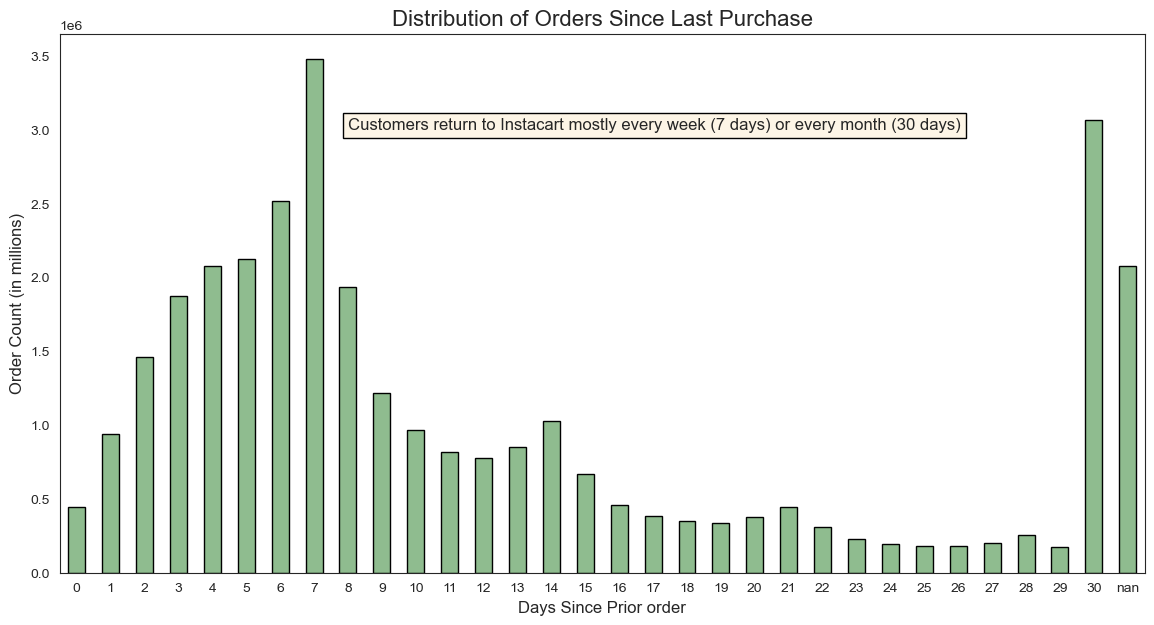

In [44]:
# Visualizing distribution of days since prior order

bar_days_since=ords_prods_all['days_since_prior_order'].value_counts(dropna = False).sort_index().plot.bar(facecolor='darkseagreen', edgecolor='black')

plt.title('Distribution of Orders Since Last Purchase', fontsize=16)
plt.xticks(rotation=0)
bar_days_since.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                                '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','nan'])
plt.xlabel('Days Since Prior order', fontsize=12)
plt.ylabel('Order Count (in millions)', fontsize=12)
plt.annotate('Customers return to Instacart mostly every week (7 days) or every month (30 days)',
             xy=(8,3000000), xytext=(8,3000000), fontsize=12, bbox={'fc':'oldlace', 'ec':'k','boxstyle': 'square,pad=0.3'})

#### Create frequency status column

We will create a frequency status column based on the customers days since prior order using the criteria:
- Non-frequent customer: median days since > 20
- Normal customer: 10 < median days since <= 20
- Frequent customer: median days since <= 10

In [45]:
# Create 'median_days_since' column in ords_prods_all

ords_prods_all['median_days_since']=ords_prods_all.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [46]:
# Create frequency_status column

ords_prods_all.loc[ords_prods_all['median_days_since']<=10, 'frequency_status'] = 'Frequent customer'
ords_prods_all.loc[(ords_prods_all['median_days_since']>10) & (ords_prods_all['median_days_since']<=20), 'frequency_status'] = 'Normal customer'
ords_prods_all.loc[ords_prods_all['median_days_since']>20, 'frequency_status'] = 'Non-frequent customer'

In [47]:
# Check frequencies of 'frequency_status' column

ords_prods_all['frequency_status'].value_counts(dropna=False)

Frequent customer        21559853
Normal customer           7208564
Non-frequent customer     3636437
NaN                             5
Name: frequency_status, dtype: int64

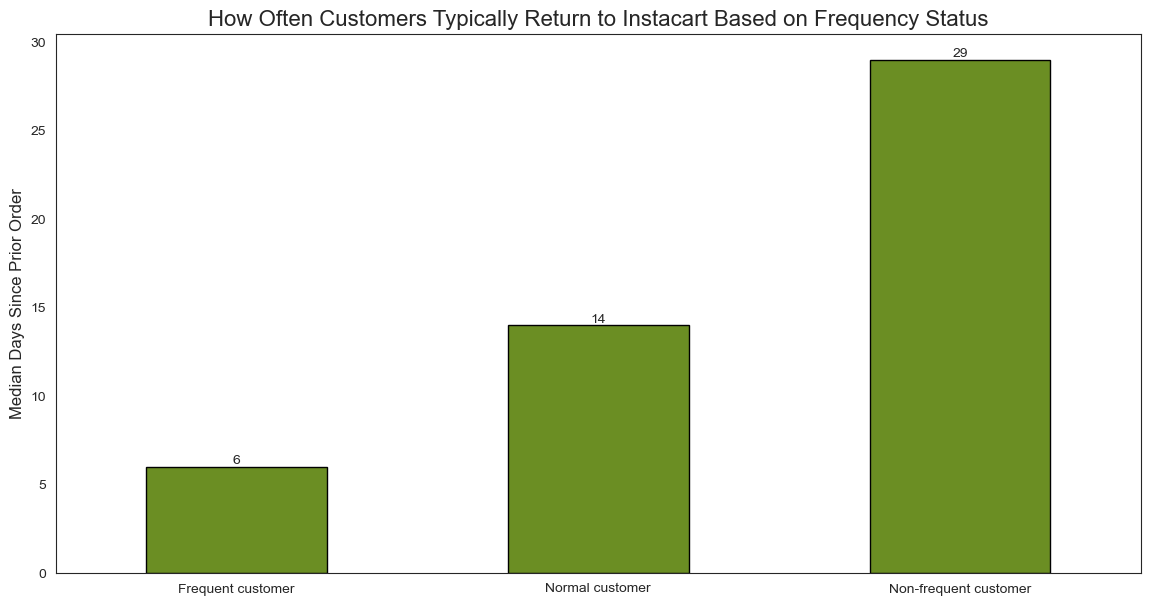

In [48]:
# Visualizing frequency status 

df=ords_prods_all.pivot_table(values='days_since_prior_order', index='frequency_status', aggfunc='median')
bar_freq_level=df.sort_values(by='days_since_prior_order').plot.bar(facecolor='olivedrab', edgecolor='black')
plt.title('How Often Customers Typically Return to Instacart Based on Frequency Status', fontsize=16)
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Median Days Since Prior Order', fontsize=12)
plt.legend(title='')
bar_freq_level.get_legend().remove()



# Display the values above the bars

for i in bar_freq_level.containers:
    bar_freq_level.bar_label(i,fmt='{:,.0f}')

In [49]:
# Export the visualizations

bar_days_since.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Distribution of orders since last purchase'), bbox_inches='tight')
bar_freq_level.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'How often customers return'), bbox_inches='tight')

<a id=low_activity_customers></a>
### Excluding low-activity customers

Inline with a request from Instacart's CFO, we will exclude customers with less than 5 orders from our analysis. The CFO is only interested in customers who generate revenue for the Instacart app.

In [50]:
# Exclude customers with max_order < 5 from ords_prods_all

ords_prods_all = ords_prods_all.drop(ords_prods_all[ords_prods_all['max_order'] < 5].index)

In [51]:
# Check the dimensions

ords_prods_all.shape

(30964564, 30)

<a id='profiling'></a>
### Customer segmentation and profiling

In alignment with directives from the marketing and business strategy divisions, several new columns will be added to the data to enable grouping and profiling the users based on the following variables: 

**profile (Household categories for which the user is purchasing groceries):**
- One-person household (single, divorced/widowed, or living with parents and siblings person with no dependants)
- Single parent (single, divorced/widowed, or living with parents person with one or more dependants)
- Family (married person with a maximum of one dependant)
- Big family (married person with two and more dependants)

In order to analyze every profile in more detail, the following columns will be created to enable grouping and analysis of users based on:

**age_category:**
- Youthful (age<30) 
- Adult (30<=age<60) 
- Senior (age=>60)  

**income_bracket:**
- Low income (<70000) 
- Regular income (70000-200000) 
- High income (>200000) 

(Note: These groupings are predicated on the data distribution within the current dataframe and do not correlate with income classifications specified by the World Bank or other financial institutions.)  

**weekday_engagement:**
- Active on weekends (most of orders were placed during weekend - days 0 and 1)
- Active on weekdays (most of orders were placed during weekdays - days 2-6) 

**time_day_engagement:** 
- During business hours (most of orders were recorded between 8 AM and 5 PM, aligning with typical business hours.)
- Beyond business hours (most of orders were recorded between 12 AM and 7 AM, as well as between 6 PM and 11 PM, which fall outside conventional business hours)


In [52]:
# Create profile column

ords_prods_all.loc[(ords_prods_all['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (ords_prods_all['n_dependants']==0), 'profile'] = 'One-person household'
ords_prods_all.loc[(ords_prods_all['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (ords_prods_all['n_dependants']>0), 'profile'] = 'Single parent'
ords_prods_all.loc[(ords_prods_all['fam_status']=='married') & (ords_prods_all['n_dependants']<2.0), 'profile'] = 'Family'
ords_prods_all.loc[(ords_prods_all['fam_status']=='married') & (ords_prods_all['n_dependants']>1.0), 'profile'] = 'Big family'

In [53]:
# Check frequencies of 'fam_status', 'n_dependants', and 'profile' column

ords_prods_all[['fam_status','n_dependants','profile']].value_counts(dropna=False)

fam_status                        n_dependants  profile             
married                           3             Big family              7284047
                                  2             Big family              7248603
                                  1             Family                  7211061
single                            0             One-person household    5094410
divorced/widowed                  0             One-person household    2645271
living with parents and siblings  1             Single parent            508045
                                  3             Single parent            488469
                                  2             Single parent            484658
dtype: int64

In [54]:
# Create age category column

ords_prods_all.loc[(ords_prods_all['age']<30), 'age_category'] = 'Youthful'
ords_prods_all.loc[(ords_prods_all['age']>=30) & (ords_prods_all['age']<60.0), 'age_category'] = 'Adult'
ords_prods_all.loc[(ords_prods_all['age']>=60), 'age_category'] = 'Senior'

In [55]:
# Check frequencies of 'age_category' column

ords_prods_all['age_category'].value_counts(dropna=False)

Adult       14572457
Senior      10574504
Youthful     5817603
Name: age_category, dtype: int64

In [56]:
# Create income bracket column

ords_prods_all.loc[(ords_prods_all['income']<70000), 'income_bracket'] = 'Low income'
ords_prods_all.loc[(ords_prods_all['income']>=70000)&(ords_prods_all['income']<=200000), 'income_bracket'] = 'Regular income'
ords_prods_all.loc[(ords_prods_all['income']>200000), 'income_bracket'] = 'High income'

In [57]:
# Check frequencies of 'income_bracket' column

ords_prods_all['income_bracket'].value_counts(dropna=False)

Regular income    22189889
Low income         8520533
High income         254142
Name: income_bracket, dtype: int64

In [58]:
# Create mode day order column

ords_prods_all['mode_day_order']=ords_prods_all.groupby('user_id')['orders_day_of_week'].transform(lambda x: x.mode().iloc[0])



# Create the weekday engagement column

ords_prods_all.loc[(ords_prods_all['mode_day_order'].isin([0,1])), 'weekday_engagement'] = 'Active on weekends'
ords_prods_all.loc[(ords_prods_all['mode_day_order'].isin([2,3,4,5,6])), 'weekday_engagement'] = 'Active on weekdays'

In [59]:
# Check frequencies of 'mode_day_order' and 'weekday_engagement' column

ords_prods_all[['mode_day_order','weekday_engagement']].value_counts(dropna=False)

mode_day_order  weekday_engagement
0               Active on weekends    8203367
1               Active on weekends    6637752
6               Active on weekdays    4347397
5               Active on weekdays    3461208
2               Active on weekdays    3127061
3               Active on weekdays    2631483
4               Active on weekdays    2556296
dtype: int64

In [60]:
# Calculating the mode value in order_day_of_the_week for each user

ords_prods_all['mode_hour_order']=ords_prods_all.groupby('user_id')['order_hour_of_day'].transform(lambda x: x.mode().iloc[0])



# Populating the 'time_day_engagement' column using the values in 'mode_hour'

ords_prods_all.loc[(ords_prods_all['mode_hour_order'].isin([8,9,10,11,12,13,14,15,16,17])), 'time_day_engagement'] = 'During business hours'
ords_prods_all.loc[(ords_prods_all['mode_hour_order'].isin([0,1,2,3,4,5,6,7,18,19,20,21,22,23])), 'time_day_engagement'] = 'Beyond business hours'

In [61]:
# Check frequencies of 'mode_hour_order' and 'time_day_engagement' column

ords_prods_all[['mode_hour_order','time_day_engagement']].value_counts(dropna=False)

mode_hour_order  time_day_engagement  
10               During business hours    3236481
9                During business hours    2934912
11               During business hours    2850808
14               During business hours    2646808
15               During business hours    2627537
16               During business hours    2596753
13               During business hours    2544891
12               During business hours    2469504
17               During business hours    1901228
8                During business hours    1826818
18               Beyond business hours    1358882
19               Beyond business hours     893167
7                Beyond business hours     783219
20               Beyond business hours     627717
21               Beyond business hours     590271
22               Beyond business hours     429080
23               Beyond business hours     229320
6                Beyond business hours     158967
0                Beyond business hours     112812
1          

<a id='profile_analysis'></a>
### Analyzing customer profiles

#### What differences can you find in ordering habits of different customer profiles?

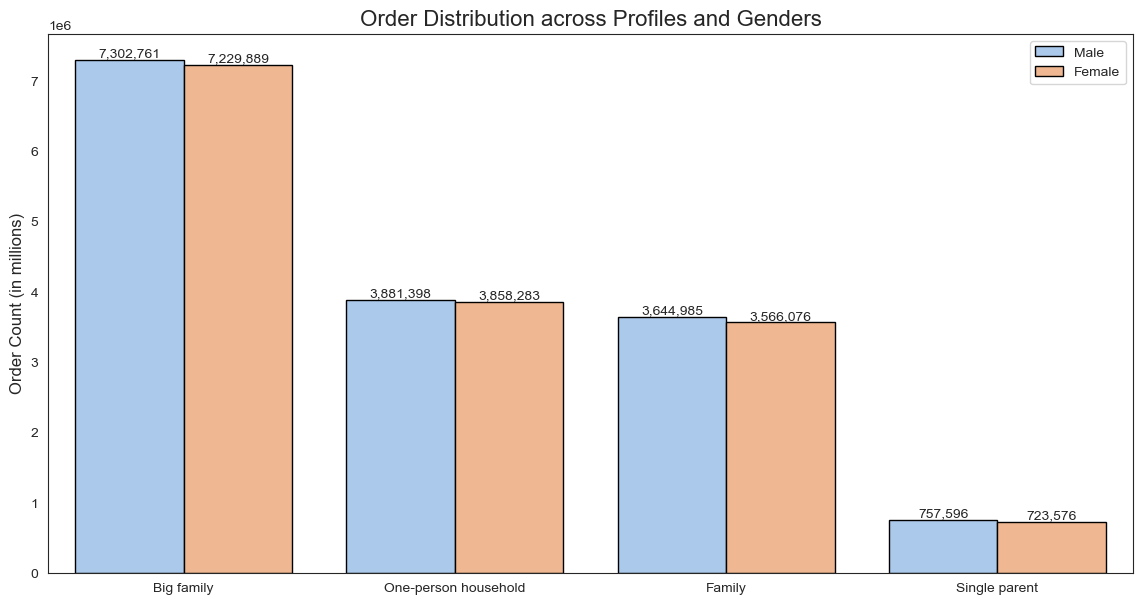

In [62]:
# Visualizing ordering habits of different customer profiles

df=ords_prods_all[['profile','gender']].value_counts(dropna=False).reset_index(name='order_count')
sns.set_palette('pastel')
bar_profile=sns.barplot(data=df, x='profile', y='order_count', hue='gender', edgecolor='black')
plt.title('Order Distribution across Profiles and Genders', fontsize=16)
plt.xlabel('')
plt.ylabel('Order Count (in millions)', fontsize=12)
plt.legend(title='')



# Display the counts above the bars

for i in bar_profile.containers:
    bar_profile.bar_label(i,fmt='{:,.0f}')

Big families contribute the most to orders. Notably, the distribution across genders is remarkably even.

In [63]:
# Export the visualization

bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profile distribution'), bbox_inches='tight')

In [64]:
# Creating subsets of data for each of the main profiling groups (type of household)

df_big=ords_prods_all[ords_prods_all['profile']=='Big family']
df_one=ords_prods_all[ords_prods_all['profile']=='One-person household']
df_fam=ords_prods_all[ords_prods_all['profile']=='Family']
df_single=ords_prods_all[ords_prods_all['profile']=='Single parent']

In [65]:
# Check the result

len(df_big)+len(df_one)+len(df_fam)+len(df_single)

30964564

<a id='further_analysis'></a>
### Further analysis of each profile

<a id='big'></a>
#### Big family

In [66]:
# Analyze the distribution of orders by age within the big family profile

big_age=df_big[['age_category']].value_counts().reset_index(name='count')
big_age

,age_category,count
0,Adult,7253282
1,Senior,5346080
2,Youthful,1933288


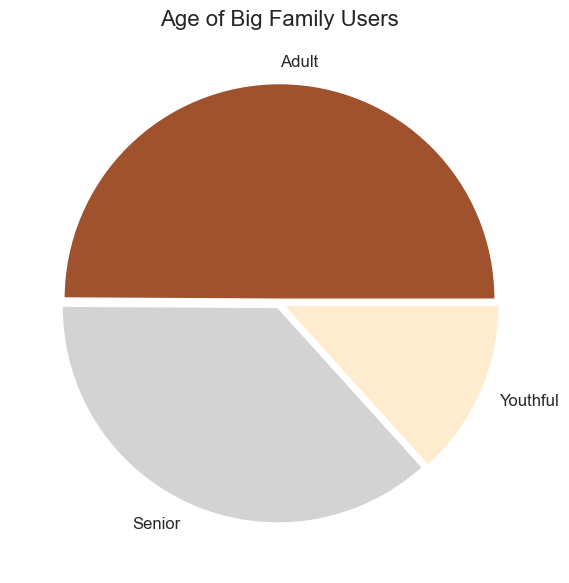

In [67]:
# Visualize the distribution of orders by age within the big family profile

pie_big_age=plt.pie(big_age['count'],
                    explode=(0.02, 0.02, 0.02),
                    colors=['sienna','lightgrey','blanchedalmond'],
                    labels=big_age['age_category'],
                    textprops={'fontsize': 12})
plt.title('Age of Big Family Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie big age'), bbox_inches='tight')

In [68]:
# Analyze the distribution of orders by income within the big family profile

big_income=df_big[['income_bracket']].value_counts().reset_index(name='count')
big_income

,income_bracket,count
0,Regular income,10632283
1,Low income,3773105
2,High income,127262


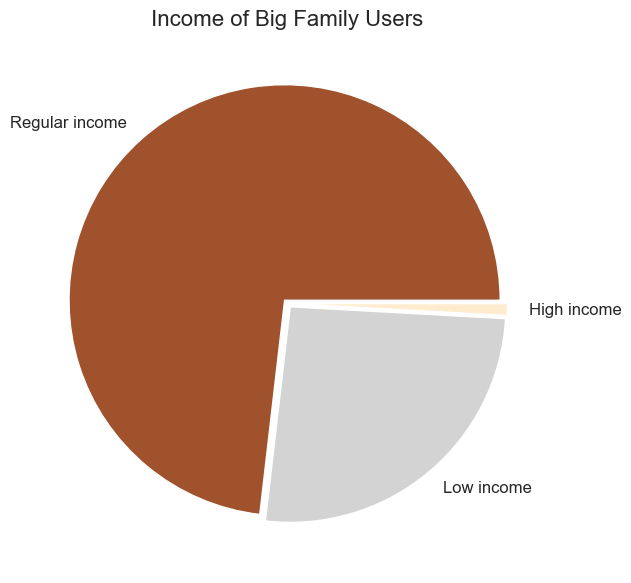

In [69]:
# Visualize the distribution of orders by income within the big family profile

pie_big_income=plt.pie(big_income['count'],
                       explode=(0.02, 0.02, 0.02), 
                       colors=['sienna','lightgrey','blanchedalmond'], 
                       labels=big_income['income_bracket'], 
                       textprops={'fontsize': 12})
plt.title('Income of Big Family Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie big income'), bbox_inches='tight')

In [70]:
# Analyze the distribution of orders by weekday engagement within the big family profile

big_weekday=df_big[['weekday_engagement']].value_counts().reset_index(name='count')
big_weekday

,weekday_engagement,count
0,Active on weekdays,7608608
1,Active on weekends,6924042


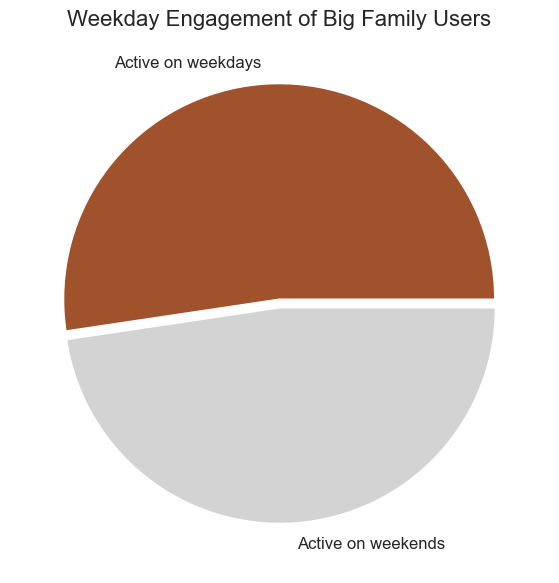

In [71]:
# Visualizing the distribution of orders by weekday engagement within the big family profile

pie_big_weekday=plt.pie(big_weekday['count'],
                        explode=(0.02, 0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=big_weekday['weekday_engagement'], 
                        textprops={'fontsize': 12})
plt.title('Weekday Engagement of Big Family Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie big day engagement'), bbox_inches='tight')

In [72]:
# Analyze the distribution of orders by time of day engagement within the big family profile

big_hour=df_big[['time_day_engagement']].value_counts().reset_index(name='count')
big_hour

,time_day_engagement,count
0,During business hours,12025087
1,Beyond business hours,2507563


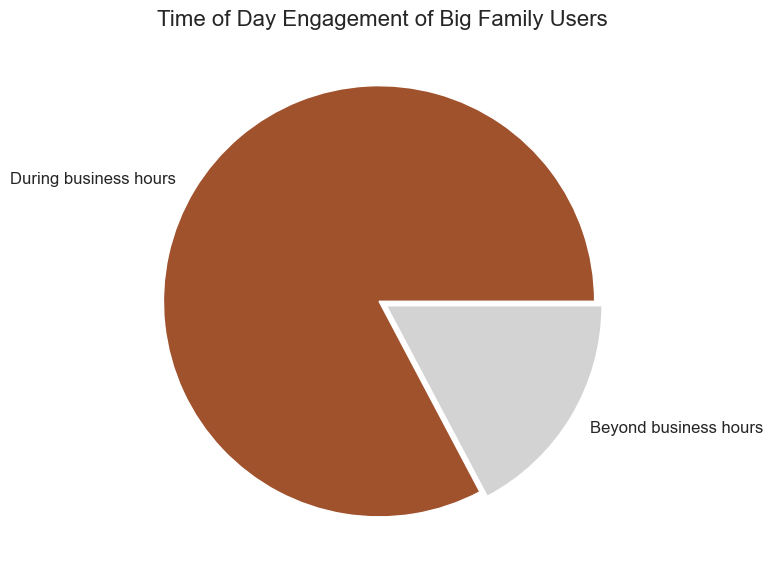

In [73]:
# Visualizing the distribution of orders by time of day engagement within the big family profile

pie_big_hour=plt.pie(big_hour['count'],
                     explode=(0.02,0.02), 
                     colors=['sienna','lightgrey','blanchedalmond'], 
                     labels=big_hour['time_day_engagement'], 
                     textprops={'fontsize': 12})
plt.title('Time of Day Engagement of Big Family Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie big hour engagement'), bbox_inches='tight')

<a id='one'></a>
#### One-person household

In [74]:
# Analyze the distribution of orders by age within the one-person household profile

one_age=df_one[['age_category']].value_counts().reset_index(name='count')
one_age

,age_category,count
0,Adult,3646792
1,Senior,2645271
2,Youthful,1447618


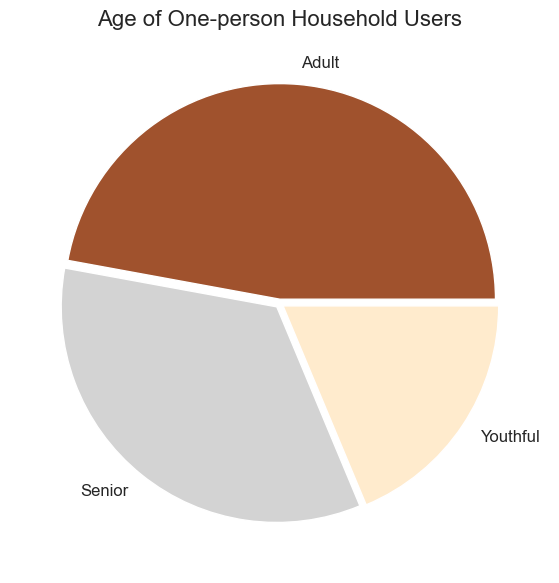

In [75]:
# Visualize the distribution of orders by age within the one-person household profile

pie_one_age=plt.pie(one_age['count'],
                    explode=(0.02, 0.02, 0.02),
                    colors=['sienna','lightgrey','blanchedalmond'],
                    labels=one_age['age_category'],
                    textprops={'fontsize': 12})
plt.title('Age of One-person Household Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie one age'), bbox_inches='tight')

In [76]:
# Analyze the distribution of orders by income within the one-person household profile

one_income=df_one[['income_bracket']].value_counts().reset_index(name='count')
one_income

,income_bracket,count
0,Regular income,5543254
1,Low income,2131821
2,High income,64606


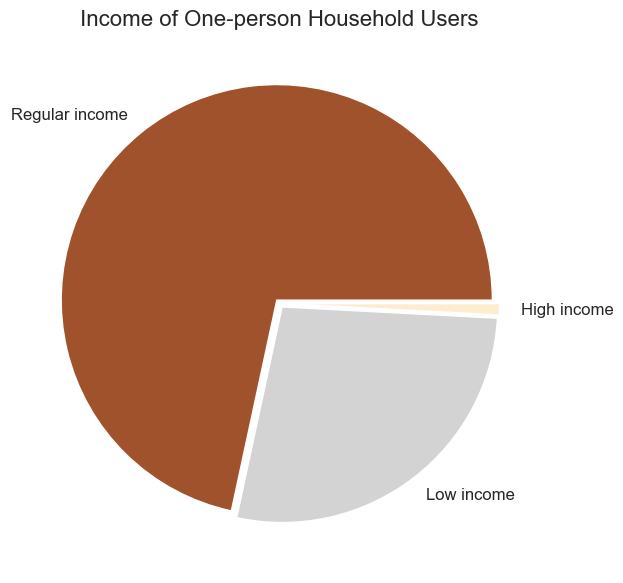

In [77]:
# Visualizing the distribution of orders by income within the one-person household profile

pie_one_income=plt.pie(one_income['count'],
                       explode=(0.02, 0.02, 0.02),
                       colors=['sienna','lightgrey','blanchedalmond'],
                       labels=one_income['income_bracket'],
                       textprops={'fontsize': 12})
plt.title('Income of One-person Household Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie one income'), bbox_inches='tight')

In [78]:
# Analyze the distribution of orders by weekday engagement within the one-person household profile

one_weekday=df_one[['weekday_engagement']].value_counts().reset_index(name='count')
one_weekday

,weekday_engagement,count
0,Active on weekdays,3971861
1,Active on weekends,3767820


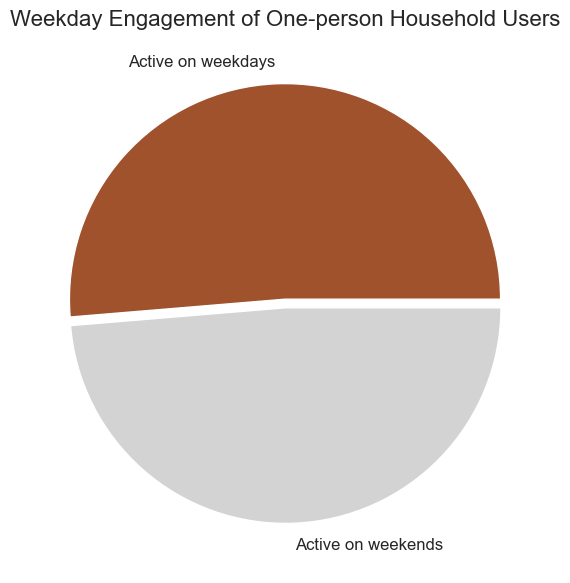

In [79]:
# Visualizing the distribution of orders by weekday engagement within the one-person household profile

pie_one_weekday=plt.pie(one_weekday['count'],
                        explode=(0.02, 0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=one_weekday['weekday_engagement'], 
                        textprops={'fontsize': 12})
plt.title('Weekday Engagement of One-person Household Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie one day engagement'), bbox_inches='tight')

In [80]:
# Analyze the distribution of orders by time of day engagement within the one-person household profile

one_hour=df_one['time_day_engagement'].value_counts().reset_index(name='count')
one_hour

,index,count
0,During business hours,6395592
1,Beyond business hours,1344089


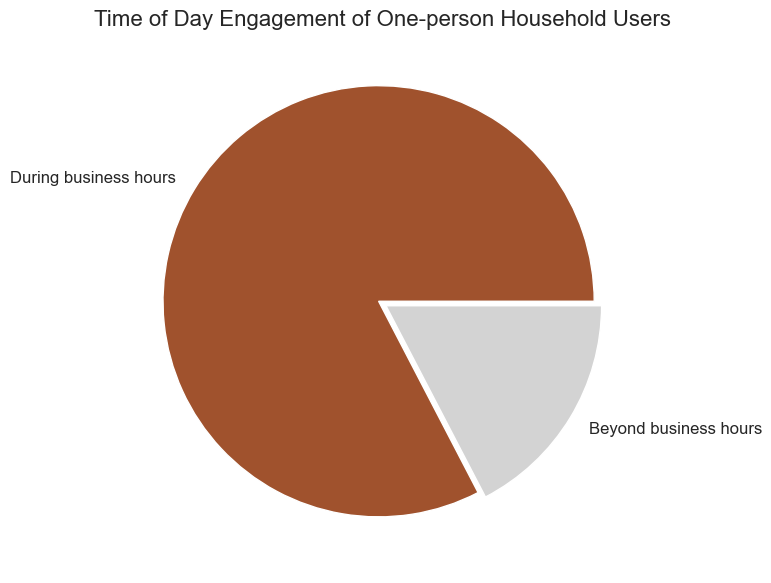

In [81]:
# Visualizing the distribution of orders by time of day engagement within the one-person household profile

pie_one_hour=plt.pie(one_hour['count'],
                     explode=(0.02, 0.02), 
                     colors=['sienna','lightgrey','blanchedalmond'], 
                     labels=one_hour['index'], 
                     textprops={'fontsize': 12})
plt.title('Time of Day Engagement of One-person Household Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie one hour engagement'), bbox_inches='tight')

<a id='family'></a>
#### Family

In [82]:
# Analyze the distribution of orders by age within the family profile

fam_age=df_fam[['age_category']].value_counts().reset_index(name='count')
fam_age

,age_category,count
0,Adult,3672383
1,Senior,2583153
2,Youthful,955525


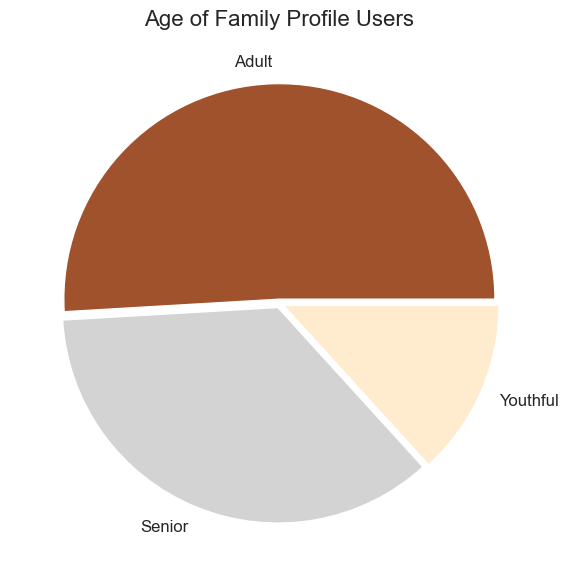

In [83]:
# Visualizing the distribution of orders by age within the family profile

pie_fam_age=plt.pie(fam_age['count'],
                     explode=(0.02, 0.02, 0.02),
                     colors=['sienna','lightgrey','blanchedalmond'],
                     labels=fam_age['age_category'],
                     textprops={'fontsize': 12})
plt.title('Age of Family Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie family age'), bbox_inches='tight')

In [84]:
# Analyze the distribution of orders by income within the family profile

fam_income=df_fam[['income_bracket']].value_counts().reset_index(name='count')
fam_income

,income_bracket,count
0,Regular income,5278618
1,Low income,1874227
2,High income,58216


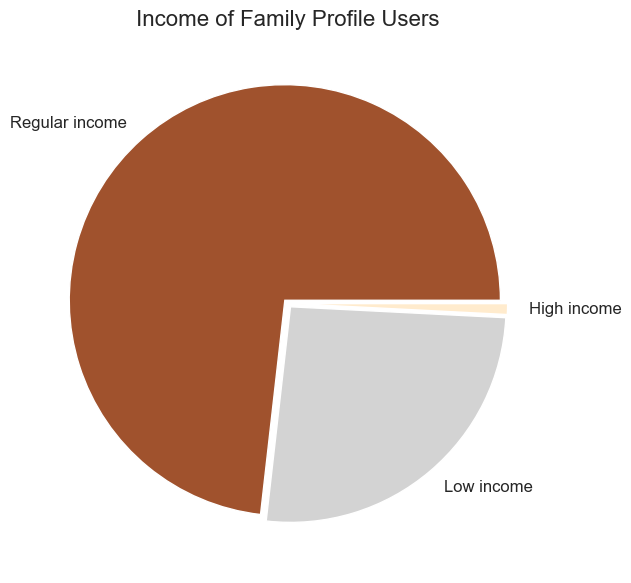

In [85]:
# Visualizing the distribution of orders by income within the family profile

pie_fam_income=plt.pie(fam_income['count'],
                       explode=(0.02, 0.02, 0.02),
                       colors=['sienna','lightgrey','blanchedalmond'],
                       labels=fam_income['income_bracket'],
                       textprops={'fontsize': 12})
plt.title('Income of Family Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie family income'), bbox_inches='tight')

In [86]:
# Analyze the distribution of orders by weekday engagement within the family profile

fam_weekday=df_fam[['weekday_engagement']].value_counts().reset_index(name='count')
fam_weekday

,weekday_engagement,count
0,Active on weekdays,3760728
1,Active on weekends,3450333


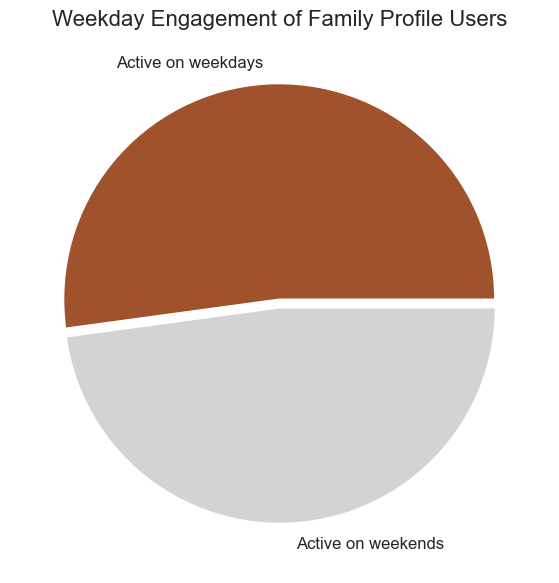

In [87]:
# Visualizing the distribution of orders by weekday engagement within the family profile

pie_fam_weekday=plt.pie(fam_weekday['count'],
                        explode=(0.02, 0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=fam_weekday['weekday_engagement'], 
                        textprops={'fontsize': 12})
plt.title('Weekday Engagement of Family Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie family day engagement'), bbox_inches='tight')

In [88]:
# Analyze the distribution of orders by time of day engagement within the family profile

fam_hour=df_fam['time_day_engagement'].value_counts().reset_index(name='count')
fam_hour

,index,count
0,During business hours,5996099
1,Beyond business hours,1214962


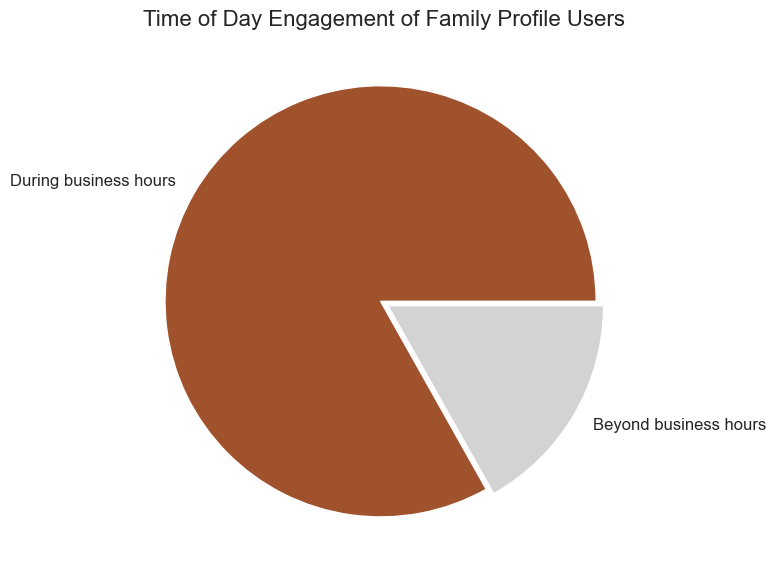

In [89]:
# Visualizing the distribution of orders by time of day engagement within the family profile

pie_fam_hour=plt.pie(fam_hour['count'],
                     explode=(0.02,0.02), 
                     colors=['sienna','lightgrey','blanchedalmond'], 
                     labels=fam_hour['index'], 
                     textprops={'fontsize': 12})
plt.title('Time of Day Engagement of Family Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie family hour engagement'), bbox_inches='tight')

<a id='single'></a>
#### Single parent

In [90]:
# Analyze the distribution of orders by age within the single parent profile

single_age=df_single[['age_category']].value_counts().reset_index(name='count')
single_age

,age_category,count
0,Youthful,1481172


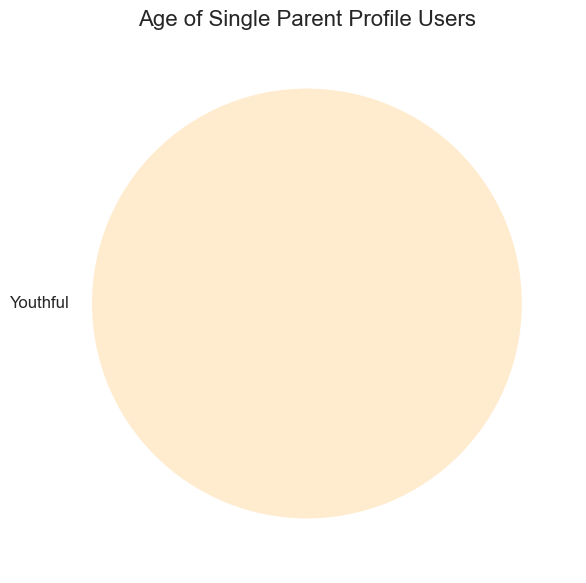

In [91]:
# Visualizing the distribution of orders by age within the single parent profile

pie_single_age=plt.pie(single_age['count'],
                       colors=['blanchedalmond'],
                       labels=single_age['age_category'],
                       textprops={'fontsize': 12})
plt.title('Age of Single Parent Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie single age'), bbox_inches='tight')

In [92]:
# Analyze the distribution of orders by income within the single parent profile

single_income=df_single[['income_bracket']].value_counts().reset_index(name='count')
single_income

,income_bracket,count
0,Low income,741380
1,Regular income,735734
2,High income,4058


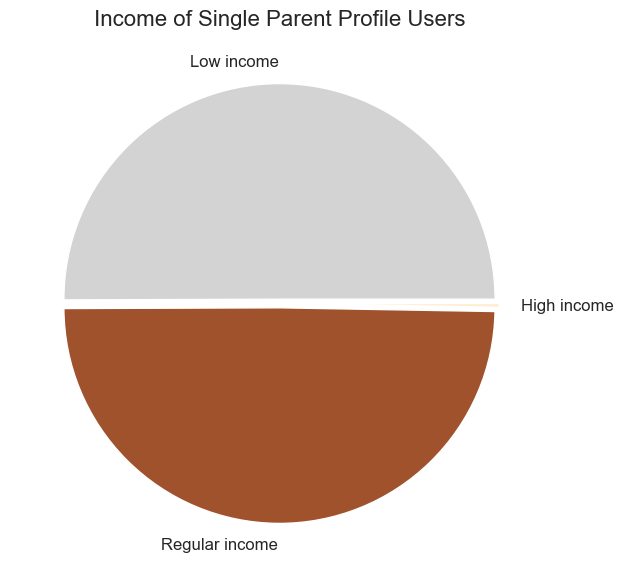

In [93]:
# Visualizing the distribution of orders by income within the single parent profile

pie_single_income=plt.pie(single_income['count'],
                          explode=(0.02, 0.02, 0.02),
                          colors=['lightgrey','sienna','blanchedalmond'],
                          labels=single_income['income_bracket'],
                          textprops={'fontsize': 12})
plt.title('Income of Single Parent Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie single income'), bbox_inches='tight')

In [94]:
# Analyze the distribution of orders by weekday engagement within the family profile

single_weekday=df_single[['weekday_engagement']].value_counts().reset_index(name='count')
single_weekday

,weekday_engagement,count
0,Active on weekdays,782248
1,Active on weekends,698924


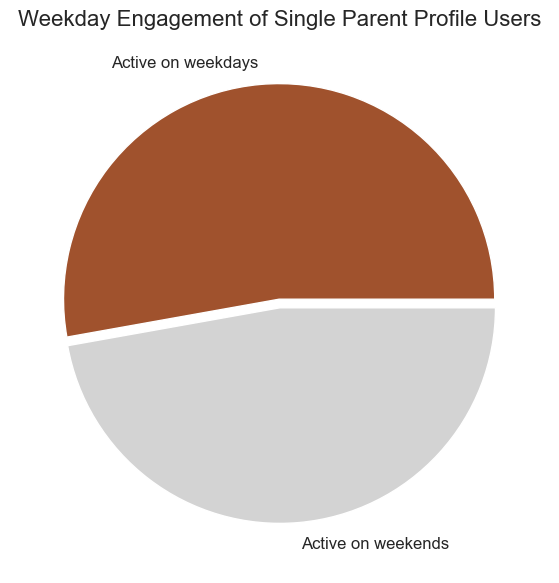

In [95]:
# Visualizing the distribution of orders by weekday engagement within the family profile

pie_single_weekday=plt.pie(single_weekday['count'],
                           explode=(0.02, 0.02), 
                           colors=['sienna','lightgrey','blanchedalmond'], 
                           labels=single_weekday['weekday_engagement'], 
                           textprops={'fontsize': 12})
plt.title('Weekday Engagement of Single Parent Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie single day engagement'), bbox_inches='tight')

In [96]:
# Analyze the distribution of orders by time of day engagement within the family profile

single_hour=df_single['time_day_engagement'].value_counts().reset_index(name='count')
single_hour

,index,count
0,During business hours,1218962
1,Beyond business hours,262210


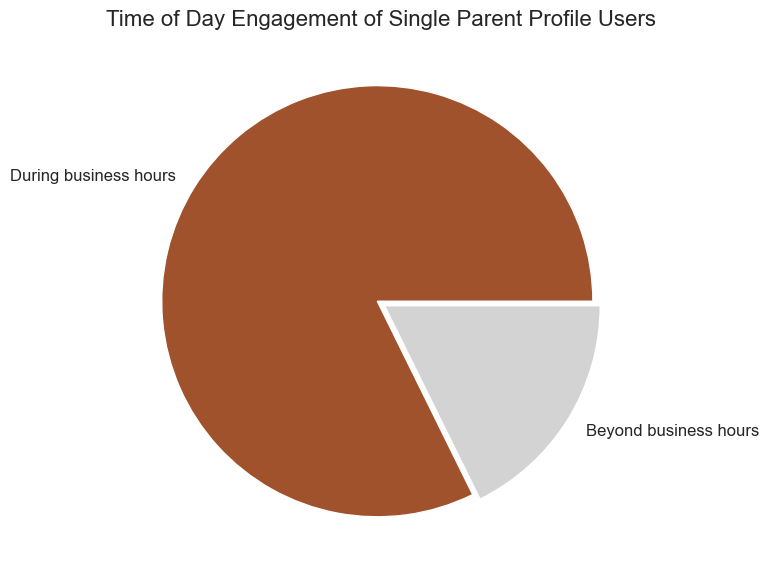

In [97]:
pie_single_hour=plt.pie(single_hour['count'],
                        explode=(0.02, 0.02), 
                        colors=['sienna','lightgrey','blanchedalmond'], 
                        labels=single_hour['index'], 
                        textprops={'fontsize': 12})
plt.title('Time of Day Engagement of Single Parent Profile Users', fontsize=16)



# Export the visualization

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie single hour engagement'), bbox_inches='tight')

<a id='behavior_analysis'></a>
### Analyzing customer behavior

<a id='usage_expenditure'></a>
#### Analysis of usage frequency and expenditure

In [98]:
# Aggregating max, mean, and min variables on a customer-profile level for usage frequency and expenditure

stats_profile=ords_prods_all.groupby(['profile','gender'])[['days_since_prior_order','prices']].agg(['mean','median','min','max'])
stats_profile.to_clipboard()
stats_profile

days_since_prior_order                    \
                                              mean median  min   max   
profile              gender                                            
Big family           Female              10.825593    7.0  0.0  30.0   
                     Male                10.822341    7.0  0.0  30.0   
Family               Female              10.782956    7.0  0.0  30.0   
                     Male                10.845666    8.0  0.0  30.0   
One-person household Female              10.753843    7.0  0.0  30.0   
                     Male                10.829862    7.0  0.0  30.0   
Single parent        Female              10.754657    7.0  0.0  30.0   
                     Male                10.747497    7.0  0.0  30.0   

                               prices                       
                                 mean    median  min   max  
profile              gender                                 
Big family           Female  7.782290  7.398438  1.0  25.0  
                     Male    7.791455  7.398438  1.0  25.0  
Family               Female  7.792639  7.398438  1.0  25.0  
                     Male    7.797081  7.398438  1.0  25.0  
One-person household Female  7.791608  7.398438  1.0  25.0  
                     Male    7.786174  7.398438  1.0  25.0  
Single parent        Female  7.791808  7.398438  1.0  25.0  
                     Male    7.807762  7.398438  1.0  25.0

**Note:** Due to the remarkably even distribution of data in the customer data set, we hardly see any difference between the minimum, maximum, and average usage frequency and expenditure across all profiles. This is due to the customer data set being fabricated in service of learning.

<a id='regional_behavior'></a>
#### Customer behavior by region

#### What is the distribution of orders by customer profile across regions?

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Comparing Profiles by Loyalty Status across Regions')

<Figure size 1600x700 with 0 Axes>

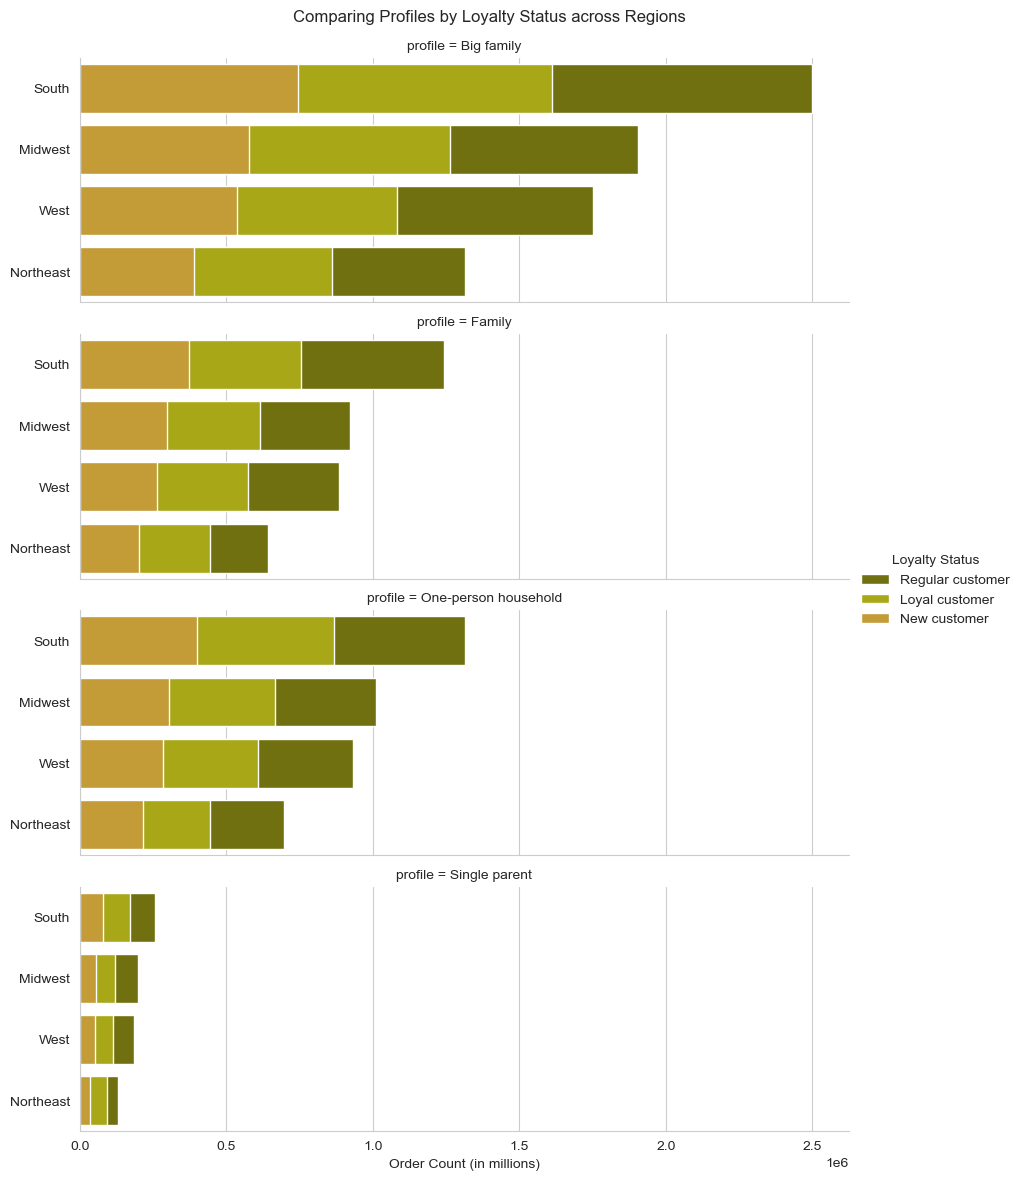

In [99]:
# Visualizing the order count by profile, region and loyalty status

df=ords_prods_all.groupby('profile')[['region','loyalty_status']].value_counts().reset_index(name='count')
sns.set_style('whitegrid')
plt.figure(figsize=(16,7))
d={'color':['olive','y', 'goldenrod']}
grid_reg=sns.FacetGrid(df,
                       row='profile',
                       hue='loyalty_status',
                       height=3,
                       aspect=3,
                       hue_kws=d)
plot=grid_reg.map(sns.barplot, 'count', 'region')
grid_reg.add_legend(title='Loyalty Status')
plt.ylabel('')
grid_reg.fig.subplots_adjust(top=0.94)
grid_reg.set_axis_labels('Order Count (in millions)','')
grid_reg.fig.suptitle('Comparing Profiles by Loyalty Status across Regions')

In [100]:
# Export the visualizaiton

grid_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order count by profile and loyalty status across regions'), bbox_inches='tight')

<a id='prod_popularity'></a>
#### Department popularity across profiles

#### What departments are most popular for different profiles?

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


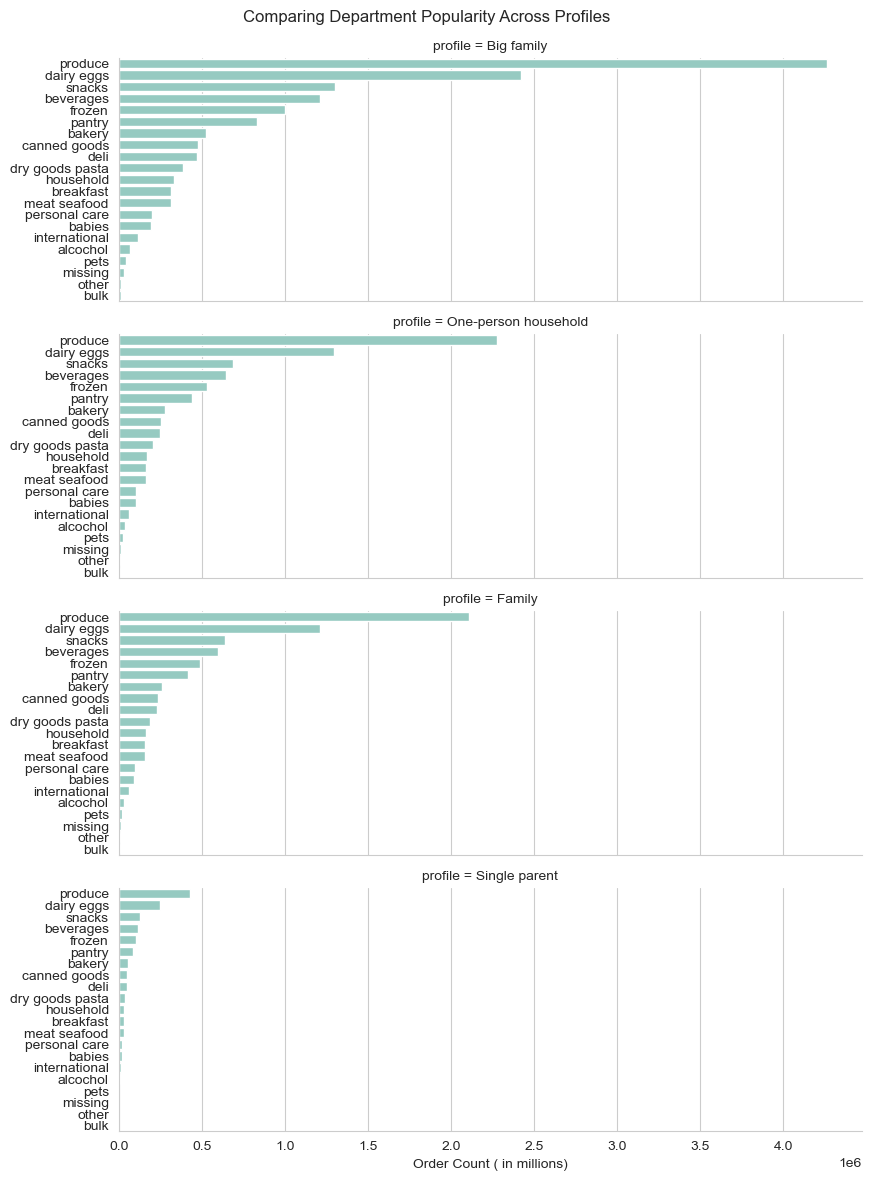

In [101]:
# Visualizing the order count by profile and department

df=ords_prods_all.groupby('profile')[['department']].value_counts().sort_values(ascending=False).reset_index(name='count')
sns.set_palette('Set3')
grid_dep=sns.FacetGrid(df,
                       row='profile',
                       height=3,
                       aspect=3)
plot=grid_dep.map(sns.barplot, 'count', 'department')
grid_dep.fig.subplots_adjust(top=0.94)
grid_dep.fig.suptitle('Comparing Department Popularity Across Profiles')
grid_dep.set_axis_labels('Order Count ( in millions)', '')

In [102]:
# Export the visualization

grid_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department popularity by profile'), bbox_inches='tight')

**Note:** The distribution of data among different groups of users seems to follow an unnaturally similar pattern. This is due to the customer data set being fabricated in service of learning.

<a id='reg_expenditure'></a>
#### Average regional expenditure across profiles

#### What is the average price of products ordered by people with different family status in different regions?

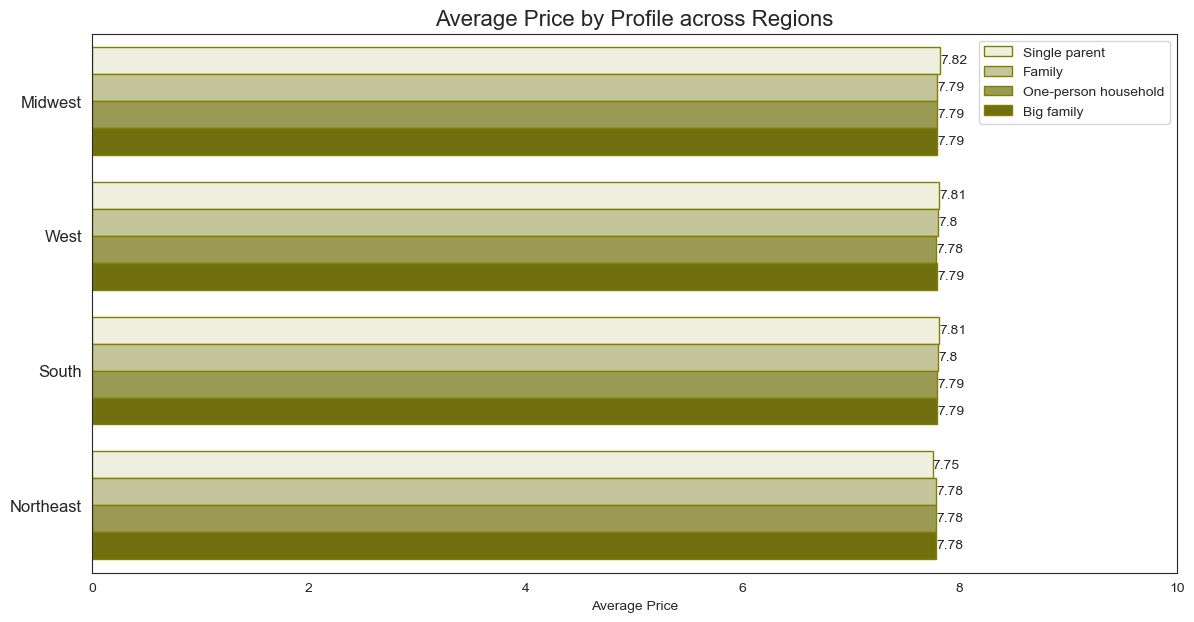

In [103]:
# Visualizing average product price across regions and family status

sns.set_style('white')
sns.set_palette('tab10')
df=ords_prods_all.groupby(['region','profile'])['prices'].mean().sort_values(ascending=False).reset_index(name='avg_price')
df['avg_price']=round(df['avg_price'],2)
bar_reg_price=sns.barplot(data=df, x='avg_price', y='region', color='olive', edgecolor='olive', hue='profile')
plt.yticks(fontsize=12)
plt.xlabel('Average Price')
plt.title('Average Price by Profile across Regions', fontsize=16)
plt.ylabel('')
plt.legend(title='', loc=0)
plt.xlim(0,10)



# Display the values to the right of the bars

for i in bar_reg_price.containers:
    bar_reg_price.bar_label(i)

In [104]:
# Export the visualization

bar_reg_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Average price by profile across regions'), bbox_inches='tight')

In [105]:
# Check the dimensions

ords_prods_all.shape

(30964564, 37)